# 6.5 ESA Task 6.5 Unsupervised machine learning: clustering - Part 2

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Verify Norway dataset import results; data wrangling

#### 03. Further exploration: lagged correlation dashboards

### 01. Import libraries and datasets

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Imports the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # Imports z-score method scaling function to standardize (normalize) numerical data.
from sklearn.decomposition import PCA # Imports the PCA algorithm for PCA analysis.

In [205]:
# This option ensures the plots created in the notebook are displayed without the need to "call" them specifically.
%matplotlib inline

In [14]:
# Import datasets

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

norway_cat_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_cat_pre_stat.pkl'))
norway_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_pre_stat.pkl'))
exo_shk_flags = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'exo_shk_flags_copy.pkl'))

In [116]:
fx_vix_comm_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

### 02. Verify Norway dataset import results; data wrangling

#### Verify the "norway_pre_stat" dataframe content is as expected.

In [24]:
norway_pre_stat.shape

(243, 31)

In [34]:
norway_pre_stat.head(15)

country  timestamp  year  month year_month month_text  gfc_flag  \
3402  Norway 2005-01-01  2005      1    2005-01        Jan     False   
3403  Norway 2005-02-01  2005      2    2005-02        Feb     False   
3404  Norway 2005-03-01  2005      3    2005-03        Mar     False   
3405  Norway 2005-04-01  2005      4    2005-04        Apr     False   
3406  Norway 2005-05-01  2005      5    2005-05        May     False   
3407  Norway 2005-06-01  2005      6    2005-06        Jun     False   
3408  Norway 2005-07-01  2005      7    2005-07        Jul     False   
3409  Norway 2005-08-01  2005      8    2005-08        Aug     False   
3410  Norway 2005-09-01  2005      9    2005-09        Sep     False   
3411  Norway 2005-10-01  2005     10    2005-10        Oct     False   
3412  Norway 2005-11-01  2005     11    2005-11        Nov     False   
3413  Norway 2005-12-01  2005     12    2005-12        Dec     False   
3414  Norway 2006-01-01  2006      1    2006-01        Jan     False   
3415  Norway 2006-02-01  2006      2    2006-02        Feb     False   
3416  Norway 2006-03-01  2006      3    2006-03        Mar     False   

      cpc_flag  cov_19_flag  rus_ukr_war_flag  ...  fx_to_usd_logret12  \
3402     False        False             False  ...                 NaN   
3403     False        False             False  ...                 NaN   
3404     False        False             False  ...                 NaN   
3405     False        False             False  ...                 NaN   
3406     False        False             False  ...                 NaN   
3407     False        False             False  ...                 NaN   
3408     False        False             False  ...                 NaN   
3409     False        False             False  ...                 NaN   
3410     False        False             False  ...                 NaN   
3411     False        False             False  ...                 NaN   
3412     False        False             False  ...                 NaN   
3413     False        False             False  ...                 NaN   
3414     False        False             False  ...            0.059023   
3415     False        False             False  ...            0.056374   
3416     False        False             False  ...            0.065444   

      int_rate_ovn_diff  int_rate_3m_diff  int_rate_10y_diff  \
3402                NaN               NaN                NaN   
3403                NaN               NaN                NaN   
3404                NaN               NaN                NaN   
3405                NaN               NaN                NaN   
3406                NaN               NaN                NaN   
3407                NaN               NaN                NaN   
3408                NaN               NaN                NaN   
3409                NaN               NaN                NaN   
3410                NaN               NaN                NaN   
3411                NaN               NaN                NaN   
3412                NaN               NaN                NaN   
3413                NaN               NaN                NaN   
3414             0.0053            0.0056            -0.0025   
3415             0.0052            0.0065            -0.0005   
3416             0.0059            0.0070            -0.0018   

      stock_index_logret12  cons_prices_logret12  gdp_pc_usd_logret12  \
3402                   NaN                   NaN                  NaN   
3403                   NaN                   NaN                  NaN   
3404                   NaN                   NaN                  NaN   
3405                   NaN                   NaN                  NaN   
3406                   NaN                   NaN                  NaN   
3407                   NaN                   NaN                  NaN   
3408                   NaN                   NaN                  NaN   
3409                   NaN                   NaN          

In [28]:
norway_pre_stat.tail(3)

country  timestamp  year  month year_month month_text  gfc_flag  \
3642  Norway 2025-01-01  2025      1    2025-01        Jan     False   
3643  Norway 2025-02-01  2025      2    2025-02        Feb     False   
3644  Norway 2025-03-01  2025      3    2025-03        Mar     False   

      cpc_flag  cov_19_flag  rus_ukr_war_flag  ...  fx_to_usd_logret12  \
3642     False        False              True  ...            0.087412   
3643     False        False              True  ...            0.059788   
3644     False        False              True  ...            0.007512   

      int_rate_ovn_diff  int_rate_3m_diff  int_rate_10y_diff  \
3642                0.0           -0.0010             0.0038   
3643                0.0           -0.0020             0.0018   
3644                0.0           -0.0016             0.0041   

      stock_index_logret12  cons_prices_logret12  gdp_pc_usd_logret12  \
3642              0.128220              0.023213             0.034977   
3643              0.158825              0.034909             0.034977   
3644              0.140900              0.026053             0.034977   

      real_gdp_chg_pct_logret12  unemp_rate_logret12  population_pct_chg  
3642                   0.020783            -0.195745            0.008322  
3643                   0.020783             0.082238            0.008322  
3644                   0.020783            -0.051293            0.008322  

[3 rows x 31 columns]

In [30]:
norway_pre_stat.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

#### Reshape and reset the index for the "norway_pre_stat" dataframe to match the temporal period range and indexing of the other dataframes, which run from Jan 2006 to Mar 2025, on a monthly temporal grain.

In [40]:
# Reset the index (the argument "drop=True" drops the original index)
norway_pre_stat.reset_index(drop=True, inplace=True)

In [44]:
# Delete first 12 rows and overwrite the dataframe
norway_pre_stat.drop(index=range(12), inplace=True)

In [46]:
norway_pre_stat.shape

(231, 31)

In [48]:
norway_pre_stat.head(3)

country  timestamp  year  month year_month month_text  gfc_flag  cpc_flag  \
12  Norway 2006-01-01  2006      1    2006-01        Jan     False     False   
13  Norway 2006-02-01  2006      2    2006-02        Feb     False     False   
14  Norway 2006-03-01  2006      3    2006-03        Mar     False     False   

    cov_19_flag  rus_ukr_war_flag  ...  fx_to_usd_logret12  int_rate_ovn_diff  \
12        False             False  ...            0.059023             0.0053   
13        False             False  ...            0.056374             0.0052   
14        False             False  ...            0.065444             0.0059   

    int_rate_3m_diff  int_rate_10y_diff  stock_index_logret12  \
12            0.0056            -0.0025              0.444747   
13            0.0065            -0.0005              0.426241   
14            0.0070            -0.0018              0.441201   

    cons_prices_logret12  gdp_pc_usd_logret12  real_gdp_chg_pct_logret12  \
12              0.018304             0.103961                   0.024693   
13              0.025502             0.103961                   0.024693   
14              0.022990             0.103961                   0.024693   

    unemp_rate_logret12  population_pct_chg  
12            -0.068993            0.008085  
13            -0.046520            0.008085  
14            -0.165080            0.008085  

[3 rows x 31 columns]

In [50]:
# Reset the index (the argument "drop=True" drops the original index)
norway_pre_stat.reset_index(drop=True, inplace=True)

In [52]:
norway_pre_stat.head(3)

country  timestamp  year  month year_month month_text  gfc_flag  cpc_flag  \
0  Norway 2006-01-01  2006      1    2006-01        Jan     False     False   
1  Norway 2006-02-01  2006      2    2006-02        Feb     False     False   
2  Norway 2006-03-01  2006      3    2006-03        Mar     False     False   

   cov_19_flag  rus_ukr_war_flag  ...  fx_to_usd_logret12  int_rate_ovn_diff  \
0        False             False  ...            0.059023             0.0053   
1        False             False  ...            0.056374             0.0052   
2        False             False  ...            0.065444             0.0059   

   int_rate_3m_diff  int_rate_10y_diff  stock_index_logret12  \
0            0.0056            -0.0025              0.444747   
1            0.0065            -0.0005              0.426241   
2            0.0070            -0.0018              0.441201   

   cons_prices_logret12  gdp_pc_usd_logret12  real_gdp_chg_pct_logret12  \
0              0.018304             0.103961                   0.024693   
1              0.025502             0.103961                   0.024693   
2              0.022990             0.103961                   0.024693   

   unemp_rate_logret12  population_pct_chg  
0            -0.068993            0.008085  
1            -0.046520            0.008085  
2            -0.165080            0.008085  

[3 rows x 31 columns]

In [54]:
norway_pre_stat.tail(3)

country  timestamp  year  month year_month month_text  gfc_flag  cpc_flag  \
228  Norway 2025-01-01  2025      1    2025-01        Jan     False     False   
229  Norway 2025-02-01  2025      2    2025-02        Feb     False     False   
230  Norway 2025-03-01  2025      3    2025-03        Mar     False     False   

     cov_19_flag  rus_ukr_war_flag  ...  fx_to_usd_logret12  \
228        False              True  ...            0.087412   
229        False              True  ...            0.059788   
230        False              True  ...            0.007512   

     int_rate_ovn_diff  int_rate_3m_diff  int_rate_10y_diff  \
228                0.0           -0.0010             0.0038   
229                0.0           -0.0020             0.0018   
230                0.0           -0.0016             0.0041   

     stock_index_logret12  cons_prices_logret12  gdp_pc_usd_logret12  \
228              0.128220              0.023213             0.034977   
229              0.158825              0.034909             0.034977   
230              0.140900              0.026053             0.034977   

     real_gdp_chg_pct_logret12  unemp_rate_logret12  population_pct_chg  
228                   0.020783            -0.195745            0.008322  
229                   0.020783             0.082238            0.008322  
230                   0.020783            -0.051293            0.008322  

[3 rows x 31 columns]

#### Verify the "exo_shk_flags" dataframe content is as expected.

In [56]:
exo_shk_flags.shape

(231, 7)

In [58]:
exo_shk_flags.head(3)

timestamp  gfc_flag  cpc_flag  cov_19_flag  rus_ukr_war_flag  \
0 2006-01-01     False     False        False             False   
1 2006-02-01     False     False        False             False   
2 2006-03-01     False     False        False             False   

   boj_int_rate_flag shock_name  
0              False   No Shock  
1              False   No Shock  
2              False   No Shock

In [60]:
exo_shk_flags.tail(3)

timestamp  gfc_flag  cpc_flag  cov_19_flag  rus_ukr_war_flag  \
228 2025-01-01     False     False        False              True   
229 2025-02-01     False     False        False              True   
230 2025-03-01     False     False        False              True   

     boj_int_rate_flag               shock_name  
228               True  Rus_Ukr_War & BOJ Pivot  
229               True  Rus_Ukr_War & BOJ Pivot  
230               True  Rus_Ukr_War & BOJ Pivot

In [62]:
exo_shk_flags.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'shock_name'],
      dtype='object')

In [118]:
fx_vix_comm_pre_stat.shape

(243, 74)

In [120]:
fx_vix_comm_pre_stat.head(15)

timestamp  year  month year_month month_text  gfc_flag  cpc_flag  \
0  2005-01-01  2005      1    2005-01        Jan     False     False   
1  2005-02-01  2005      2    2005-02        Feb     False     False   
2  2005-03-01  2005      3    2005-03        Mar     False     False   
3  2005-04-01  2005      4    2005-04        Apr     False     False   
4  2005-05-01  2005      5    2005-05        May     False     False   
5  2005-06-01  2005      6    2005-06        Jun     False     False   
6  2005-07-01  2005      7    2005-07        Jul     False     False   
7  2005-08-01  2005      8    2005-08        Aug     False     False   
8  2005-09-01  2005      9    2005-09        Sep     False     False   
9  2005-10-01  2005     10    2005-10        Oct     False     False   
10 2005-11-01  2005     11    2005-11        Nov     False     False   
11 2005-12-01  2005     12    2005-12        Dec     False     False   
12 2006-01-01  2006      1    2006-01        Jan     False     False   
13 2006-02-01  2006      2    2006-02        Feb     False     False   
14 2006-03-01  2006      3    2006-03        Mar     False     False   

    cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  ...  wti_avg_logret12  \
0         False             False              False  ...               NaN   
1         False             False              False  ...               NaN   
2         False             False              False  ...               NaN   
3         False             False              False  ...               NaN   
4         False             False              False  ...               NaN   
5         False             False              False  ...               NaN   
6         False             False              False  ...               NaN   
7         False             False              False  ...               NaN   
8         False             False              False  ...               NaN   
9         False             False              False  ...               NaN   
10        False             False              False  ...               NaN   
11        False             False              False  ...               NaN   
12        False             False              False  ...          0.335465   
13        False             False              False  ...          0.250573   
14        False             False              False  ...          0.146838   

    brent_avg_logret12  nat_gas_eu_avg_logret12  lng_asia_avg_logret12  \
0                  NaN                      NaN                    NaN   
1                  NaN                      NaN                    NaN   
2                  NaN                      NaN                    NaN   
3                  NaN                      NaN                    NaN   
4                  NaN                      NaN                    NaN   
5                  NaN                      NaN                    NaN   
6                  NaN                      NaN                    NaN   
7                  NaN                      NaN                    NaN   
8                  NaN                      NaN                    NaN   
9                  NaN                      NaN                    NaN   
10                 NaN                      NaN                    NaN   
11                 NaN                      NaN                    NaN   
12            0.359997                 0.414646               0.232039   
13            0.285218                 0.414646               0.257307   
14            0.164536                 0.414646               0.202498   

    metals_idx_avg_logret12  iron_ore_avg_logret12  copper_avg_logret12  \
0                       NaN                    NaN                  NaN   
1                       NaN                    NaN                  NaN   
2                       NaN                    NaN                  NaN   
3                       NaN                    NaN                  NaN   
4                       Na

In [122]:
fx_vix_comm_pre_stat.tail(3)

timestamp  year  month year_month month_text  gfc_flag  cpc_flag  \
240 2025-01-01  2025      1    2025-01        Jan     False     False   
241 2025-02-01  2025      2    2025-02        Feb     False     False   
242 2025-03-01  2025      3    2025-03        Mar     False     False   

     cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  ...  wti_avg_logret12  \
240        False              True               True  ...          0.021216   
241        False              True               True  ...         -0.076930   
242        False              True               True  ...         -0.174869   

     brent_avg_logret12  nat_gas_eu_avg_logret12  lng_asia_avg_logret12  \
240           -0.011698                 0.437476               0.343717   
241           -0.084259                 0.637948               0.512185   
242           -0.169132                 0.433658               0.378025   

     metals_idx_avg_logret12  iron_ore_avg_logret12  copper_avg_logret12  \
240                -0.046635              -0.274710             0.072208   
241                 0.009276              -0.151745             0.116488   
242                 0.043760              -0.061186             0.113314   

     aluminum_avg_logret12  gold_oz_usd_logret12  food_idx_avg_logret12  
240               0.155268              0.286810               0.000664  
241               0.197657              0.358192              -0.017491  
242               0.173413              0.323844              -0.050646  

[3 rows x 74 columns]

In [124]:
fx_vix_comm_pre_stat.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

#### Reshape the "fx_vix_comm_pre_stat" dataframe to have the same temporal range and index number sequence as the other dataframes, which means deleting the year 2005 monthly data rows (which have NaN values for all the annual log return variables based on the 12-period lag in the log return calculation).

In [126]:
# Delete first 12 rows and overwrite the dataframe
fx_vix_comm_pre_stat.drop(index=range(12), inplace=True)

In [128]:
fx_vix_comm_pre_stat.shape

(231, 74)

In [130]:
fx_vix_comm_pre_stat.head(3)

timestamp  year  month year_month month_text  gfc_flag  cpc_flag  \
12 2006-01-01  2006      1    2006-01        Jan     False     False   
13 2006-02-01  2006      2    2006-02        Feb     False     False   
14 2006-03-01  2006      3    2006-03        Mar     False     False   

    cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  ...  wti_avg_logret12  \
12        False             False              False  ...          0.335465   
13        False             False              False  ...          0.250573   
14        False             False              False  ...          0.146838   

    brent_avg_logret12  nat_gas_eu_avg_logret12  lng_asia_avg_logret12  \
12            0.359997                 0.414646               0.232039   
13            0.285218                 0.414646               0.257307   
14            0.164536                 0.414646               0.202498   

    metals_idx_avg_logret12  iron_ore_avg_logret12  copper_avg_logret12  \
12                 0.248924               0.173926             0.403719   
13                 0.248784               0.173926             0.426659   
14                 0.225671               0.173926             0.416321   

    aluminum_avg_logret12  gold_oz_usd_logret12  food_idx_avg_logret12  
12               0.260799              0.259859              -0.008664  
13               0.264717              0.270769              -0.020714  
14               0.202034              0.250028              -0.032650  

[3 rows x 74 columns]

In [132]:
fx_vix_comm_pre_stat.tail(3)

timestamp  year  month year_month month_text  gfc_flag  cpc_flag  \
240 2025-01-01  2025      1    2025-01        Jan     False     False   
241 2025-02-01  2025      2    2025-02        Feb     False     False   
242 2025-03-01  2025      3    2025-03        Mar     False     False   

     cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  ...  wti_avg_logret12  \
240        False              True               True  ...          0.021216   
241        False              True               True  ...         -0.076930   
242        False              True               True  ...         -0.174869   

     brent_avg_logret12  nat_gas_eu_avg_logret12  lng_asia_avg_logret12  \
240           -0.011698                 0.437476               0.343717   
241           -0.084259                 0.637948               0.512185   
242           -0.169132                 0.433658               0.378025   

     metals_idx_avg_logret12  iron_ore_avg_logret12  copper_avg_logret12  \
240                -0.046635              -0.274710             0.072208   
241                 0.009276              -0.151745             0.116488   
242                 0.043760              -0.061186             0.113314   

     aluminum_avg_logret12  gold_oz_usd_logret12  food_idx_avg_logret12  
240               0.155268              0.286810               0.000664  
241               0.197657              0.358192              -0.017491  
242               0.173413              0.323844              -0.050646  

[3 rows x 74 columns]

In [134]:
# Reset the index (the argument "drop=True" drops the original index)
fx_vix_comm_pre_stat.reset_index(drop=True, inplace=True)

In [136]:
fx_vix_comm_pre_stat.head(3)

timestamp  year  month year_month month_text  gfc_flag  cpc_flag  \
0 2006-01-01  2006      1    2006-01        Jan     False     False   
1 2006-02-01  2006      2    2006-02        Feb     False     False   
2 2006-03-01  2006      3    2006-03        Mar     False     False   

   cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  ...  wti_avg_logret12  \
0        False             False              False  ...          0.335465   
1        False             False              False  ...          0.250573   
2        False             False              False  ...          0.146838   

   brent_avg_logret12  nat_gas_eu_avg_logret12  lng_asia_avg_logret12  \
0            0.359997                 0.414646               0.232039   
1            0.285218                 0.414646               0.257307   
2            0.164536                 0.414646               0.202498   

   metals_idx_avg_logret12  iron_ore_avg_logret12  copper_avg_logret12  \
0                 0.248924               0.173926             0.403719   
1                 0.248784               0.173926             0.426659   
2                 0.225671               0.173926             0.416321   

   aluminum_avg_logret12  gold_oz_usd_logret12  food_idx_avg_logret12  
0               0.260799              0.259859              -0.008664  
1               0.264717              0.270769              -0.020714  
2               0.202034              0.250028              -0.032650  

[3 rows x 74 columns]

In [138]:
fx_vix_comm_pre_stat.tail(3)

timestamp  year  month year_month month_text  gfc_flag  cpc_flag  \
228 2025-01-01  2025      1    2025-01        Jan     False     False   
229 2025-02-01  2025      2    2025-02        Feb     False     False   
230 2025-03-01  2025      3    2025-03        Mar     False     False   

     cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  ...  wti_avg_logret12  \
228        False              True               True  ...          0.021216   
229        False              True               True  ...         -0.076930   
230        False              True               True  ...         -0.174869   

     brent_avg_logret12  nat_gas_eu_avg_logret12  lng_asia_avg_logret12  \
228           -0.011698                 0.437476               0.343717   
229           -0.084259                 0.637948               0.512185   
230           -0.169132                 0.433658               0.378025   

     metals_idx_avg_logret12  iron_ore_avg_logret12  copper_avg_logret12  \
228                -0.046635              -0.274710             0.072208   
229                 0.009276              -0.151745             0.116488   
230                 0.043760              -0.061186             0.113314   

     aluminum_avg_logret12  gold_oz_usd_logret12  food_idx_avg_logret12  
228               0.155268              0.286810               0.000664  
229               0.197657              0.358192              -0.017491  
230               0.173413              0.323844              -0.050646  

[3 rows x 74 columns]

In [140]:
fx_vix_comm_pre_stat.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

### Note: Data consistency, accuracy and other checks were conducted on the imported dataframes in prior Tasks, thus will not be repeated here.

## 03. Further exploration: lagged correlation dashboards

#### The timing of direction changes for variables in the PC1 & PC2 Timeline line plots in the separate notebook "6.5 ESA Task 6.5 Unsupervised machine learning - Part 1", suggests that running a time-lagged cross-correlations dashboard may help spot time-shifted (lagged) correlations between some variables.  For example, typically inflation and interest rates are positively correlated but the latter lags behind the former, as Central Banks adjust interest policy only after confirmation (which takes time) that the rolling measured inflation rate increase is not "transitory".

#### Comment: for the Use Case of calculating lagged cross-correlations amongst variables, the best approach for the Norway dataset's monthly temporal data grain is to convert numerical data to standardized 1-month log returns.  This transformation creates change-based, scale- and volatility-neutral comparable data series.

## Data wrangling

#### Wrangle and transform the raw data into pandas Series of standardized 1-month log return values for the variables to be correlated. Also create a Boolean Series to flag the temporal period during which the analyzed shock was in effect. These Series will be inputs to the lagged correlation dashboard function.

In [1044]:
norway_pre_stat.shape

(231, 31)

In [1085]:
norway_pre_stat.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

In [1097]:
norway_std_log_ret1 = norway_pre_stat[['stock_index', 'fx_to_usd', 'cons_prices', 'int_rate_10y', 'unemp_rate']].copy()

In [1099]:
norway_std_log_ret1[['vix_avg', 'brent_avg', 'aud_jpy']] = fx_vix_comm_pre_stat[['vix_avg', 'brent_avg', 'aud_jpy']]

##### Comment: AUDJPY is added here to the Norway dataset out of curiosity, to see how its correlations with different variables compare to the VIX correlations with the same variables.  Both AUDJPY and the VIX are risk sentiment barometers, although AUDJPY is seen as more broad-based (capital flows-based, whereas the VIX is US equity derivatives market-specific).

In [1101]:
norway_std_log_ret1.shape

(231, 8)

#### Transform raw data variables to 1-month log returns

In [1103]:
log_returns = np.log(norway_std_log_ret1/norway_std_log_ret1.shift(1))

In [1109]:
log_returns.shape

(231, 8)

In [1125]:
log_returns.head(3)

stock_index  fx_to_usd  cons_prices  int_rate_10y  unemp_rate   vix_avg  \
0          NaN        NaN          NaN           NaN         NaN       NaN   
1     0.046543   0.017938     0.008429      0.018997    0.000000  0.035091   
2     0.048475  -0.017938     0.002395      0.031749   -0.074108 -0.064592   

   brent_avg   aud_jpy  
0        NaN       NaN  
1  -0.040289  0.010109  
2   0.031404 -0.024998

#### Standardize the log returns

In [1127]:
from scipy.stats import zscore

In [1147]:
# The lambda function script tells the zscore function to ignore NaN values when calculating the z-scores

std_log_returns = log_returns.apply(lambda x: zscore(x, nan_policy='omit'))

In [1149]:
std_log_returns.shape

(231, 8)

In [1159]:
std_log_returns[['timestamp']] = norway_pre_stat[['timestamp']].copy()

In [1161]:
std_log_returns.shape

(231, 9)

In [1157]:
std_log_returns.head(3)

stock_index  fx_to_usd  cons_prices  int_rate_10y  unemp_rate   vix_avg  \
0          NaN        NaN          NaN           NaN         NaN       NaN   
1     0.830920   0.585567     1.302275      0.212257    0.004255  0.174884   
2     0.870968  -0.738928     0.047671      0.357963   -0.720451 -0.361481   

   brent_avg   aud_jpy  timestamp  
0        NaN       NaN 2006-01-01  
1  -0.447514  0.289844 2006-02-01  
2   0.338227 -0.752685 2006-03-01

##### Delete first row of NaN values stemming from the 1-month log return calculations for the time series first month

In [1163]:
# Delete first row which has NaN values and overwrite the dataframe
std_log_returns.drop(index=range(1), inplace=True)

In [1165]:
# Reset the index (the argument "drop=True" drops the original index)
std_log_returns.reset_index(drop=True, inplace=True)

In [1167]:
std_log_returns.shape

(230, 9)

In [1169]:
std_log_returns.head(3)

stock_index  fx_to_usd  cons_prices  int_rate_10y  unemp_rate   vix_avg  \
0     0.830920   0.585567     1.302275      0.212257    0.004255  0.174884   
1     0.870968  -0.738928     0.047671      0.357963   -0.720451 -0.361481   
2     1.491669  -1.437915     1.283485      0.659859    0.004255  0.059214   

   brent_avg   aud_jpy  timestamp  
0  -0.447514  0.289844 2006-02-01  
1   0.338227 -0.752685 2006-03-01  
2   1.245450  0.252961 2006-04-01

In [1171]:
std_log_returns.tail(3)

stock_index  fx_to_usd  cons_prices  int_rate_10y  unemp_rate   vix_avg  \
227     0.632024   0.348624     0.011871      0.851023   -1.235258  0.279663   
228    -0.081560  -0.567854     2.453632     -0.004797    0.265046  0.053069   
229     0.083259  -1.797306    -1.820923      0.400216    0.004255  1.343594   

     brent_avg   aud_jpy  timestamp  
227   0.712308  0.017078 2025-01-01  
228  -0.434741 -0.563809 2025-02-01  
229  -0.520733 -0.586976 2025-03-01

#### Create Series of Boolean masks (flags) for shock periods of interest, and a "no shock" period for comparison purposes.

In [1218]:
shocks_bool = exo_shk_flags.copy()

In [1220]:
shocks_bool.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'shock_name'],
      dtype='object')

In [1222]:
shocks_bool.head(3)

timestamp  gfc_flag  cpc_flag  cov_19_flag  rus_ukr_war_flag  \
0 2006-01-01     False     False        False             False   
1 2006-02-01     False     False        False             False   
2 2006-03-01     False     False        False             False   

   boj_int_rate_flag shock_name  
0              False   No Shock  
1              False   No Shock  
2              False   No Shock

In [1225]:
# The np.where() method is efficient for simple conditions
# Adds a boolean values column for "no shock" periods to the dataframe

shocks_bool['no_shock_flag'] = np.where(shocks_bool['shock_name'] == 'No Shock', True, False)

In [1227]:
shocks_bool.head(3)

timestamp  gfc_flag  cpc_flag  cov_19_flag  rus_ukr_war_flag  \
0 2006-01-01     False     False        False             False   
1 2006-02-01     False     False        False             False   
2 2006-03-01     False     False        False             False   

   boj_int_rate_flag shock_name  no_shock_flag  
0              False   No Shock           True  
1              False   No Shock           True  
2              False   No Shock           True

In [1231]:
# Delete first row and overwrite the dataframe, so it matches exactly the timescale range of the newly-created Series for other variables
shocks_bool.drop(index=range(1), inplace=True)

In [1233]:
# Reset the index (the argument "drop=True" drops the original index)
shocks_bool.reset_index(drop=True, inplace=True)

In [1235]:
shocks_bool.shape

(230, 8)

In [1237]:
shocks_bool.head(3)

timestamp  gfc_flag  cpc_flag  cov_19_flag  rus_ukr_war_flag  \
0 2006-02-01     False     False        False             False   
1 2006-03-01     False     False        False             False   
2 2006-04-01     False     False        False             False   

   boj_int_rate_flag shock_name  no_shock_flag  
0              False   No Shock           True  
1              False   No Shock           True  
2              False   No Shock           True

In [1239]:
shocks_bool.tail(3)

timestamp  gfc_flag  cpc_flag  cov_19_flag  rus_ukr_war_flag  \
227 2025-01-01     False     False        False              True   
228 2025-02-01     False     False        False              True   
229 2025-03-01     False     False        False              True   

     boj_int_rate_flag               shock_name  no_shock_flag  
227               True  Rus_Ukr_War & BOJ Pivot          False  
228               True  Rus_Ukr_War & BOJ Pivot          False  
229               True  Rus_Ukr_War & BOJ Pivot          False

In [1241]:
shocks_bool.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'shock_name', 'no_shock_flag'],
      dtype='object')

In [1494]:
# Convert the relevant shock flag column values from shocks_bool dataframe into a Series with corresponding automatically-generated index numbers
# If no index= argument is added (e.g. the case here), the pd.Series() method will create a numerical index of integers starting from zero
# pandas Series need an index value associated with each element
# The boolean shock flags (masks) are converted to Series as the required object type for a custom function to be defined and called (further below)

gfc_mask_num_idx = pd.Series(shocks_bool['gfc_flag'].values)

In [1496]:
# Check first 3 elements and corresponding index values of the pandas Series
gfc_mask_num_idx[0:3]

0    False
1    False
2    False
dtype: bool

In [1498]:
# Check the last 3 elements and corresponding index values
gfc_mask_num_idx[-3:]

227    False
228    False
229    False
dtype: bool

In [1500]:
# Convert more shock flags into Series
no_shock_mask_num_idx = pd.Series(shocks_bool['no_shock_flag'].values)
cov_19_mask_num_idx = pd.Series(shocks_bool['cov_19_flag'].values)

In [1502]:
no_shock_mask_num_idx[0:3]

0    True
1    True
2    True
dtype: bool

In [1504]:
no_shock_mask_num_idx[-3:]

227    False
228    False
229    False
dtype: bool

In [1506]:
cov_19_mask_num_idx[0:3]

0    False
1    False
2    False
dtype: bool

In [1508]:
cov_19_mask_num_idx[-3:]

227    False
228    False
229    False
dtype: bool

## Define a custom function

#### Define a custom function to batch-calculate a lagged correlation dashboard for multiple variables filtered to specific shock, normal or full periods.  The LLM ChatGPt was engaged to customize the function, troubleshoot and optimize formatting output due to the large number (>60) of intended line plot visualizations. 

In [1489]:
import matplotlib.pyplot as plt
import numpy as np


def lagged_corr(x, y, max_lag):
    """Compute lagged correlations between two Series for lags 0 to max_lag."""
    return [x.shift(lag).corr(y) for lag in range(max_lag + 1)]


def batch_lagged_corr_dashboard(
    data,
    target_col,
    compare_cols,
    focus_mask=None,
    baseline_mask=None,
    max_lag=12,
    title_prefix="Lagged Corr",
    figsize=(12, 16),
    rows=4
):
    """
    Create a dashboard of lagged correlation line plots.

    Parameters:
    - data: DataFrame with standardized numeric time series.
    - target_col: str, the column to lag.
    - compare_cols: list of str, columns to compare against.
    - focus_mask: Boolean Series (e.g. shock period)
    - baseline_mask: Boolean Series (e.g. no_shock period)
    - max_lag: int, how far to lag the target_col.
    - title_prefix: str, prefix for each subplot title.
    - figsize: tuple, size of entire dashboard.
    - rows: number of subplot rows.
    """
    cols = len(compare_cols)
    cols_per_row = (cols + rows - 1) // rows
    fig, axes = plt.subplots(rows, cols_per_row, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(compare_cols):
        ax = axes[idx]

        if focus_mask is not None:
            lagged_focus = lagged_corr(data[target_col][focus_mask], data[col][focus_mask], max_lag)
            ax.plot(range(max_lag + 1), lagged_focus, '-o', label='Focus Period', color='red')

        if baseline_mask is not None:
            lagged_base = lagged_corr(data[target_col][baseline_mask], data[col][baseline_mask], max_lag)
            ax.plot(range(max_lag + 1), lagged_base, '-x', label='Baseline Period', color='blue')

        if focus_mask is None and baseline_mask is None:
            lagged_all = lagged_corr(data[target_col], data[col], max_lag)
            ax.plot(range(max_lag + 1), lagged_all, '-o', label='Full Period', color='green')

        ax.set_title(f"{title_prefix}: {target_col} (lagged) vs {col}")
        ax.set_xlabel("Lag (months)")
        ax.set_ylabel("Correlation")
        ax.legend()
        ax.grid(True)

    for j in range(cols, len(axes)):
        fig.delaxes(axes[j])  # Clean up empty subplots

    fig.tight_layout()
    plt.show()

In [1285]:
std_log_returns.columns

Index(['stock_index', 'fx_to_usd', 'cons_prices', 'int_rate_10y', 'unemp_rate',
       'vix_avg', 'brent_avg', 'aud_jpy', 'timestamp'],
      dtype='object')

## Call the custom function

## GFC ("Focus Period") vs No-Shock ("Baseline Period")

### Run lagged (up to 12 months) correlations on standardized 1-month log return data pairs

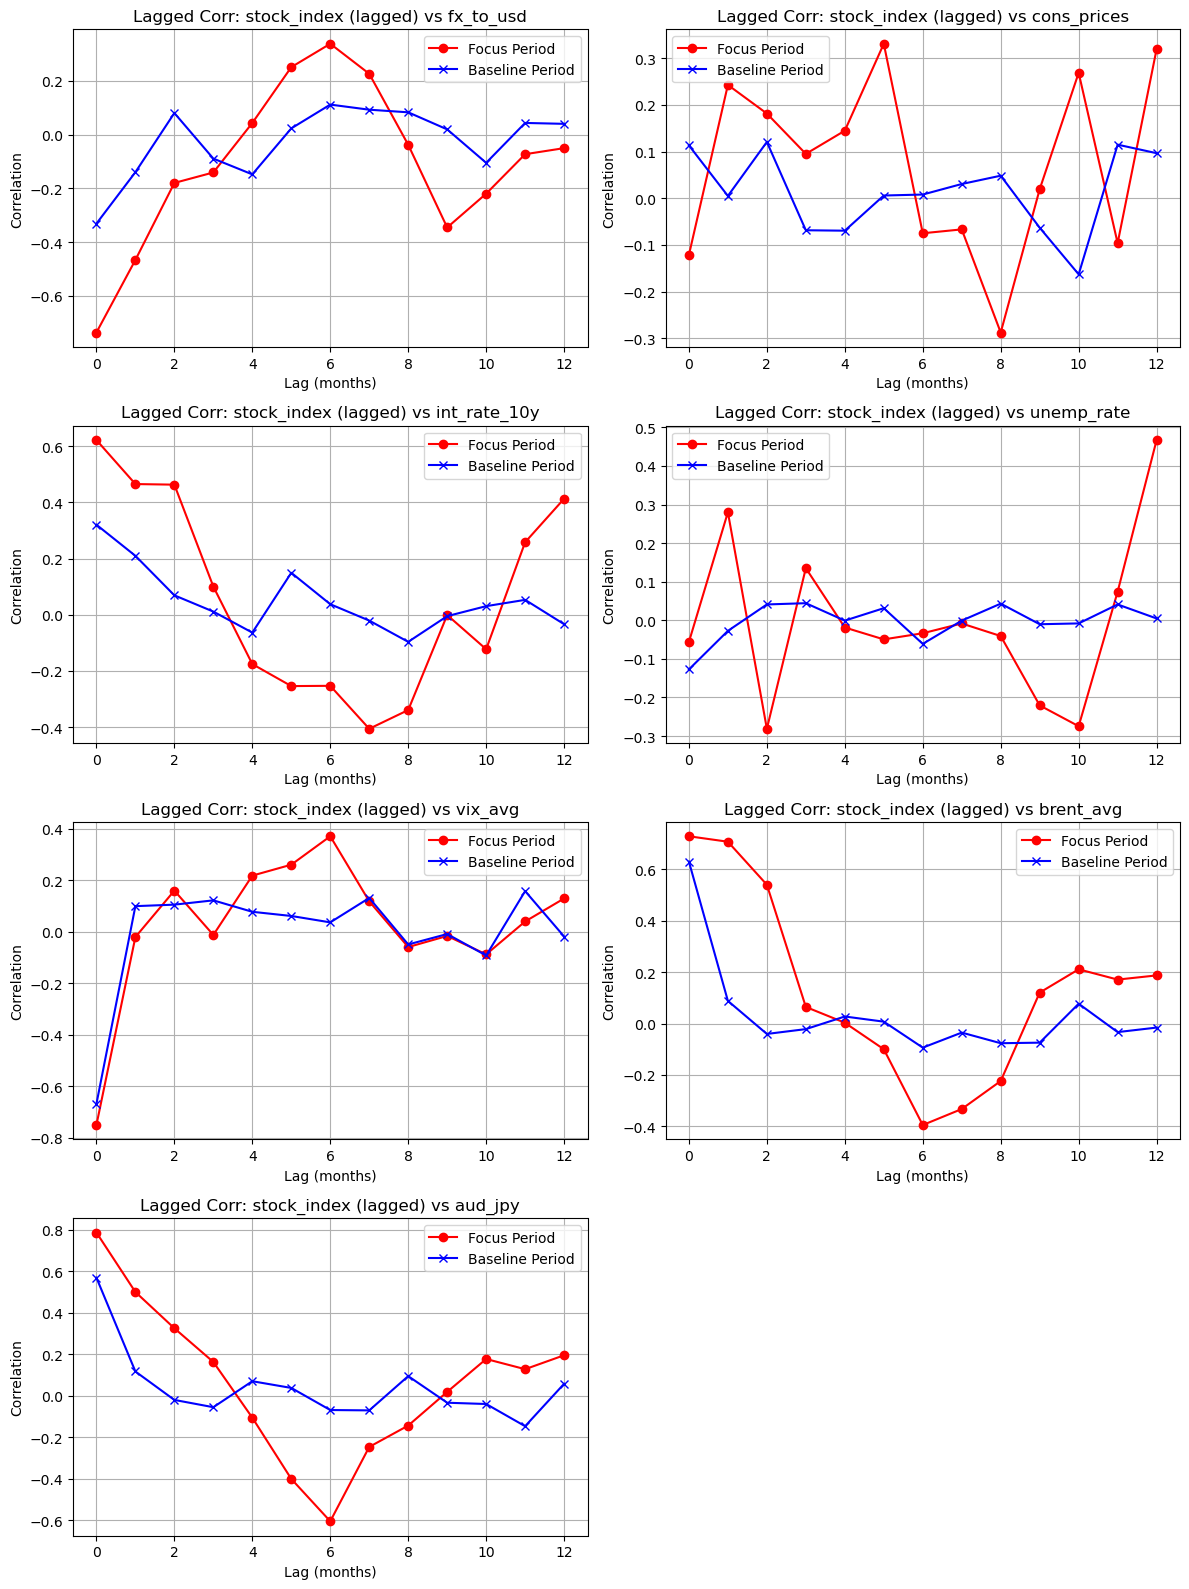

In [1337]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='stock_index',
    compare_cols=['fx_to_usd', 'cons_prices', 'int_rate_10y', 'unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=gfc_mask_num_idx,
    baseline_mask=no_shock_mask_num_idx,
    max_lag=12,
    rows=4
)

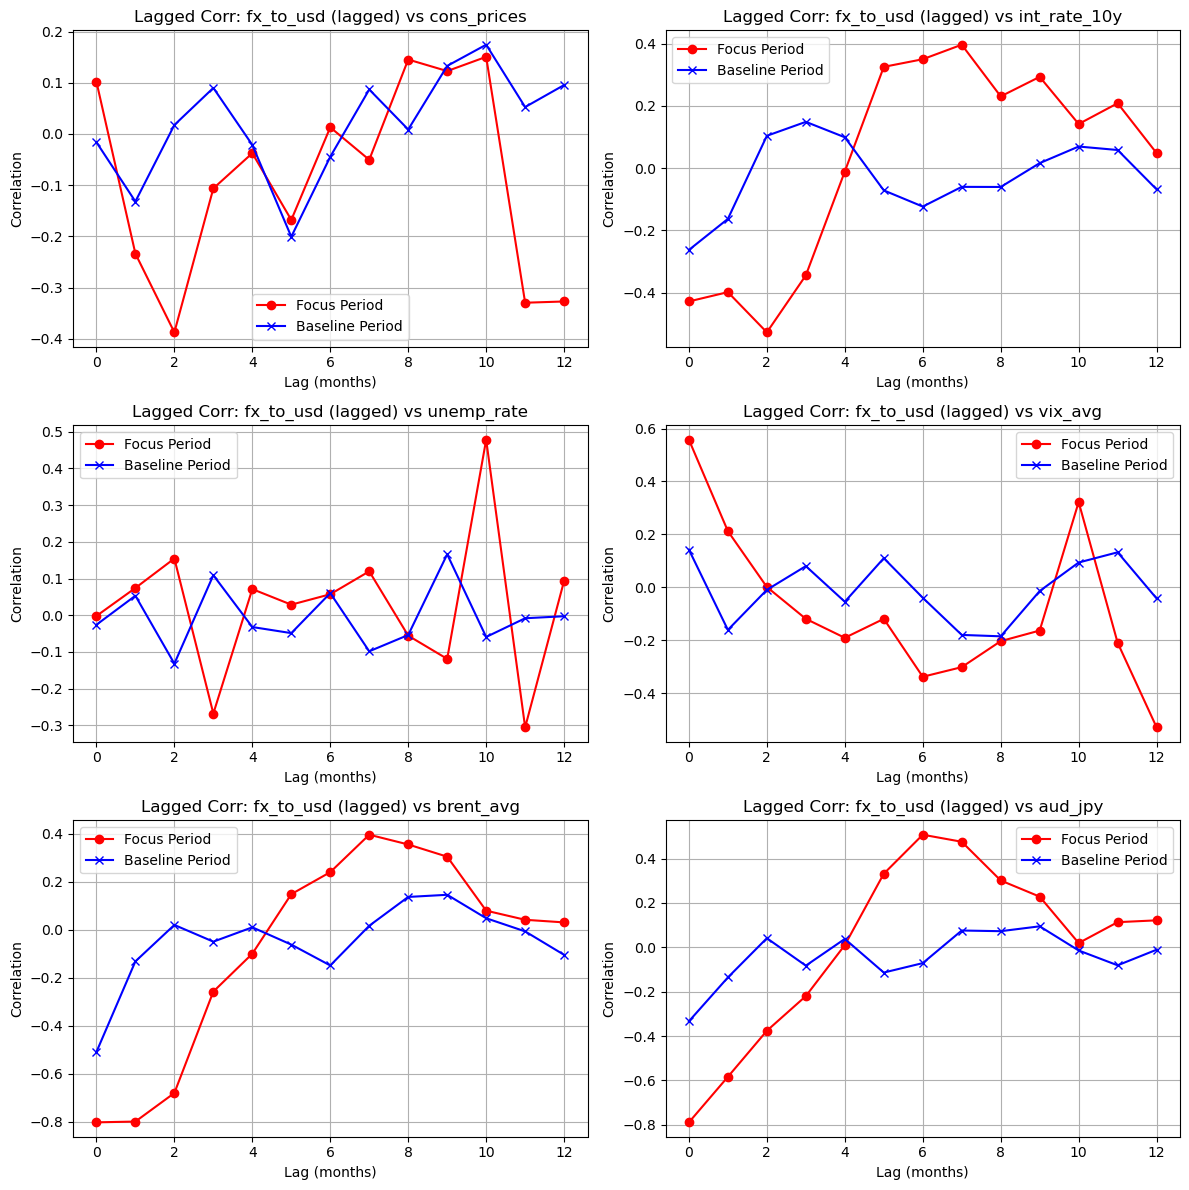

In [1341]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='fx_to_usd',
    compare_cols=['cons_prices', 'int_rate_10y', 'unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=gfc_mask_num_idx,
    baseline_mask=no_shock_mask_num_idx,
    max_lag=12,
    figsize=(12, 12),
    rows=3
)

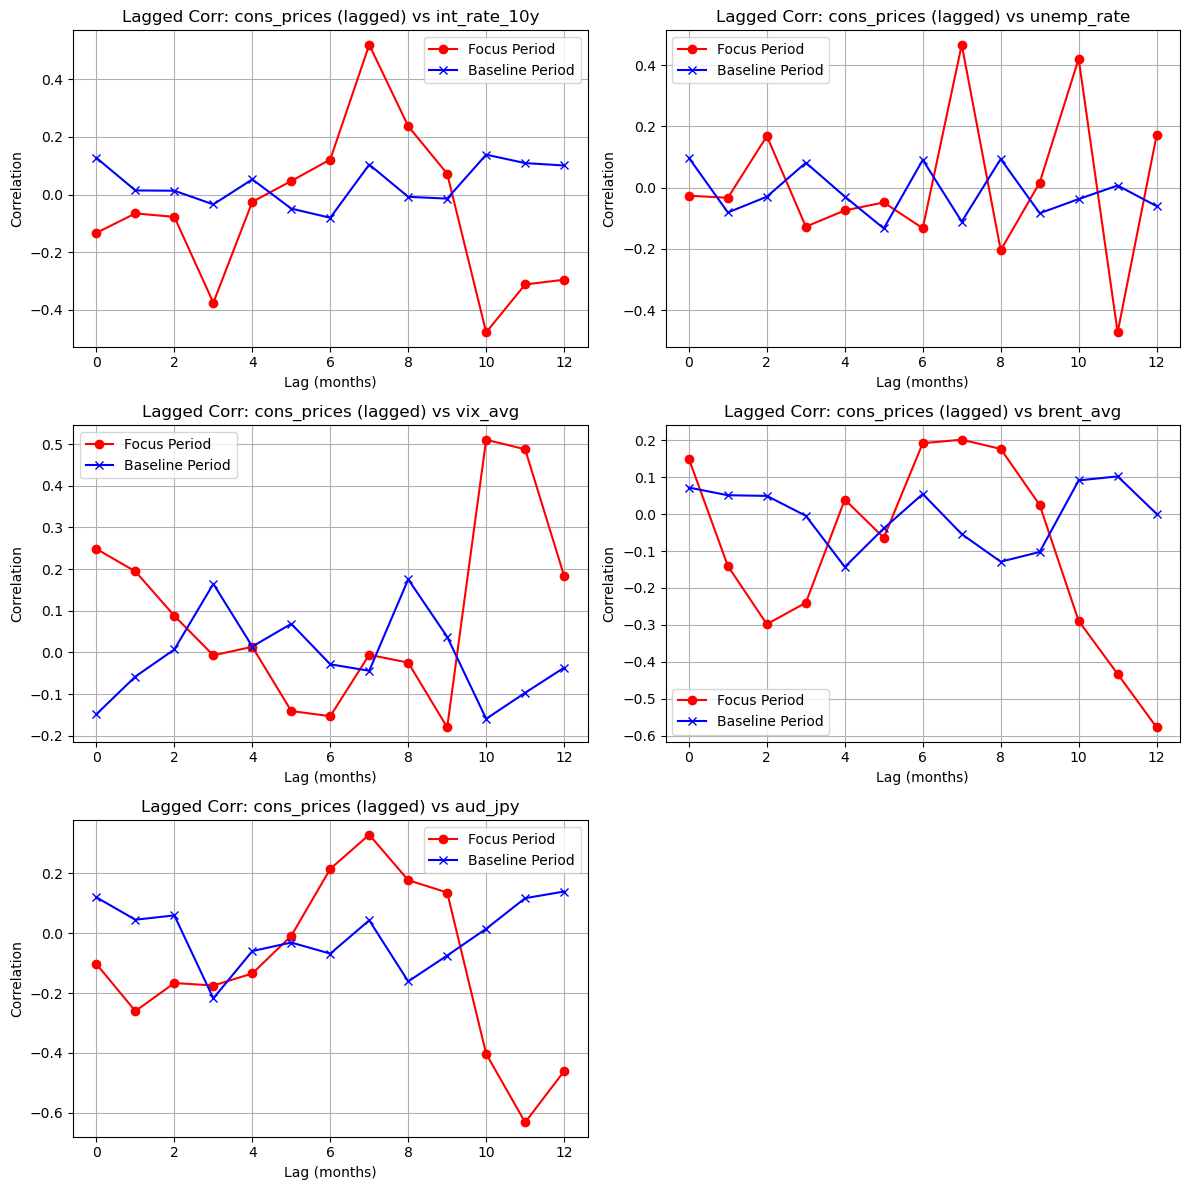

In [1345]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='cons_prices',
    compare_cols=['int_rate_10y', 'unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=gfc_mask_num_idx,
    baseline_mask=no_shock_mask_num_idx,
    max_lag=12,
    figsize=(12, 12),
    rows=3
)

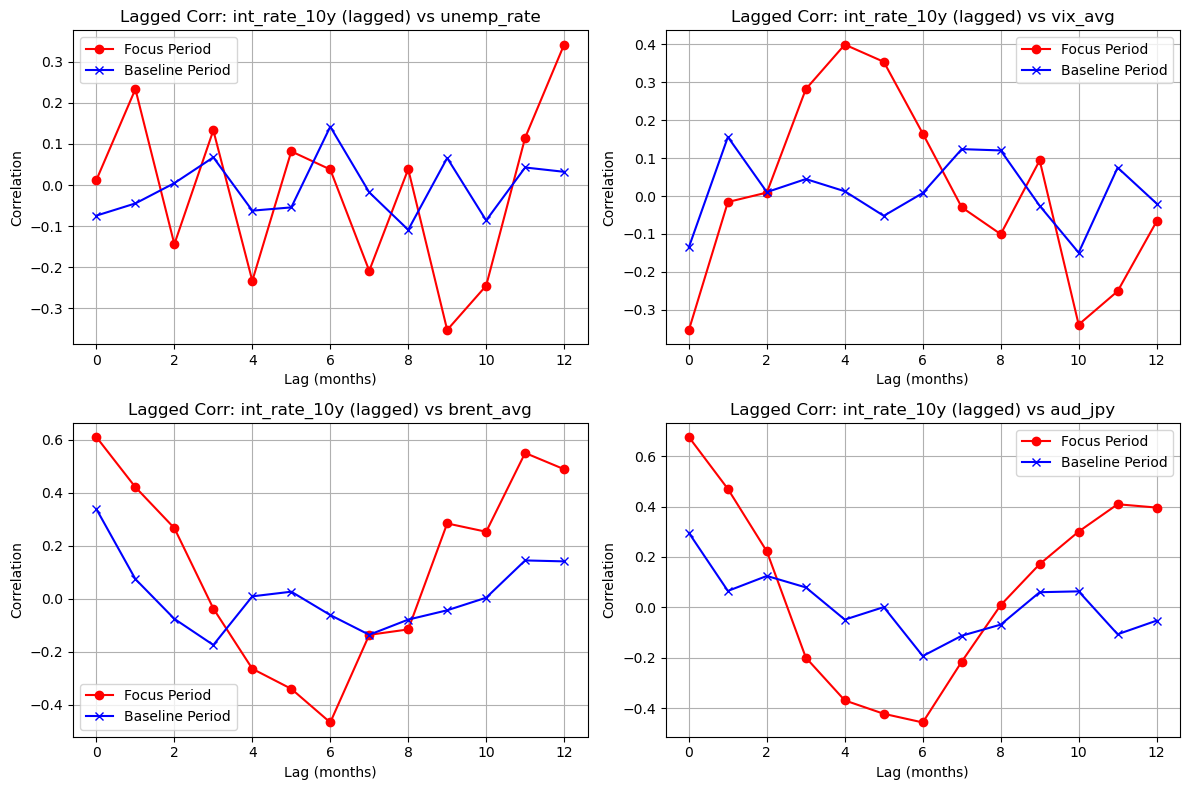

In [1347]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='int_rate_10y',
    compare_cols=['unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=gfc_mask_num_idx,
    baseline_mask=no_shock_mask_num_idx,
    max_lag=12,
    figsize=(12, 8),
    rows=2
)

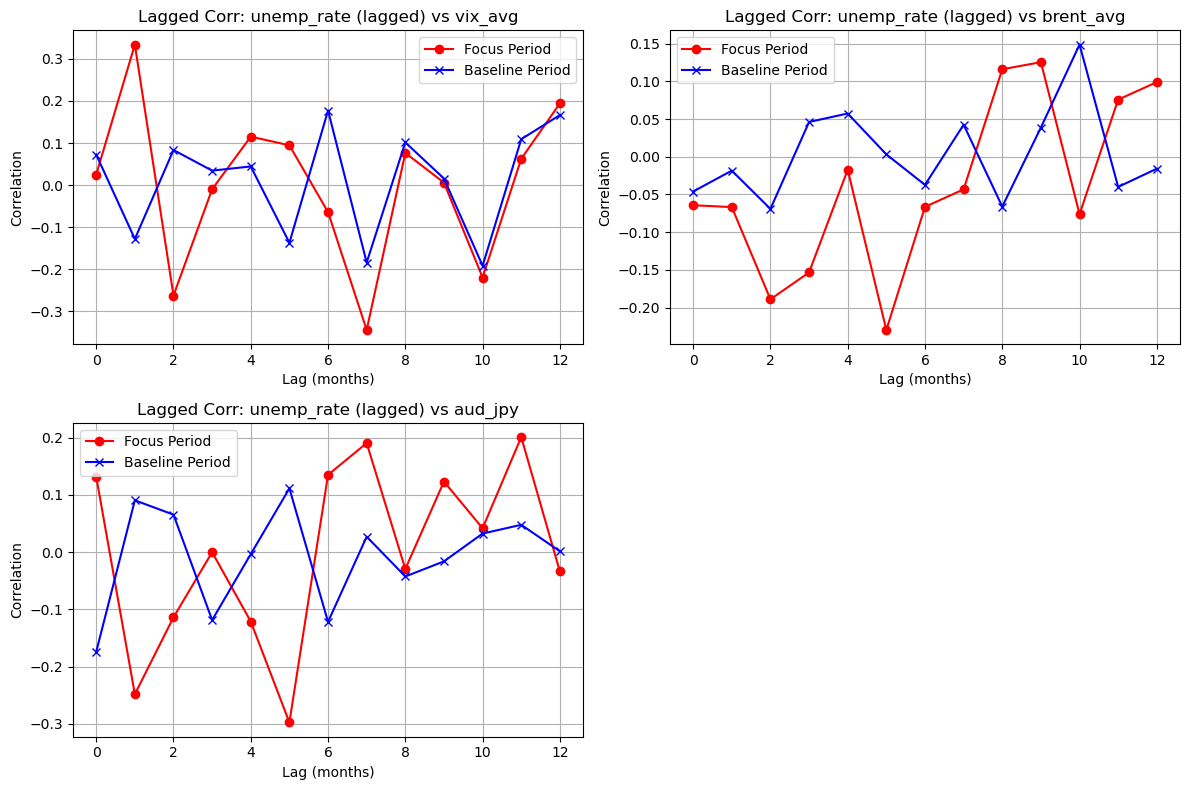

In [1349]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='unemp_rate',
    compare_cols=['vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=gfc_mask_num_idx,
    baseline_mask=no_shock_mask_num_idx,
    max_lag=12,
    figsize=(12, 8),
    rows=2
)

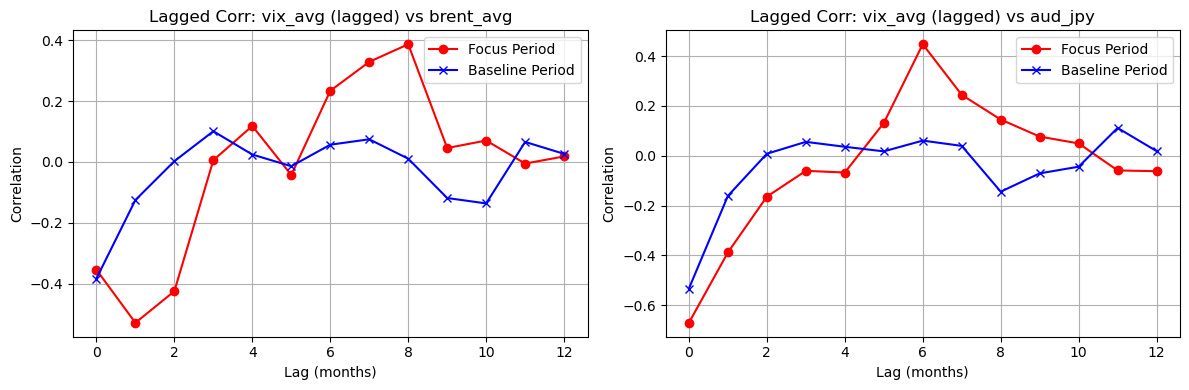

In [1357]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='vix_avg',
    compare_cols=['brent_avg', 'aud_jpy'],
    focus_mask=gfc_mask_num_idx,
    baseline_mask=no_shock_mask_num_idx,
    max_lag=12,
    figsize=(12, 4),
    rows=1
)

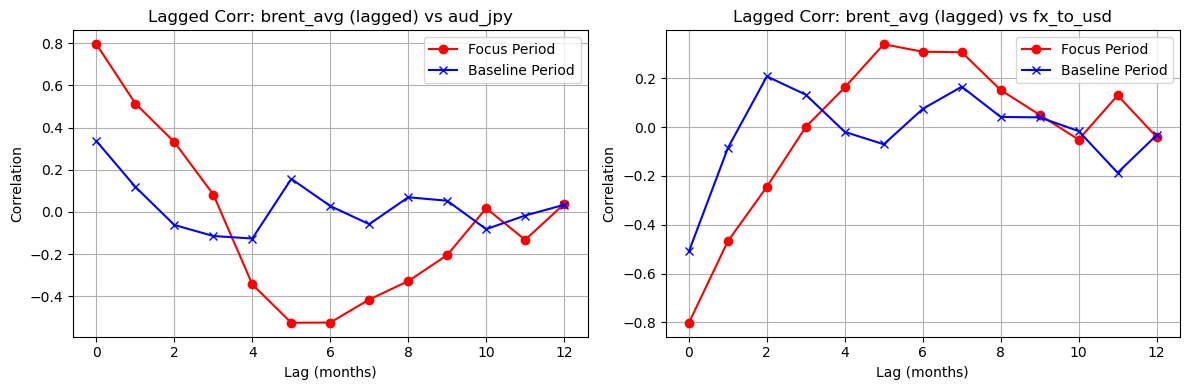

In [1367]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='brent_avg',
    compare_cols=['aud_jpy', 'fx_to_usd'],
    focus_mask=gfc_mask_num_idx,
    baseline_mask=no_shock_mask_num_idx,
    max_lag=12,
    figsize=(12, 4),
    rows=1
)

### Findings

#### (1) For the peak absolute value of correlation strength ~0.4 or higher instances, only the GFC ("Focus Period") data pairs in some cases reached a higher peak than no lag (lag=0), but the corresponding optimal lag period varied widely, from 2 months to 12 months depending on the correlation pair.  Meanwhile, for the No Shock ("Baseline Period", normal times), lagging did not move the needle much if any on correlation strength maximization. The interest rate and unemployment rate variables are typically where one finds correlation strength optimized at non-zero lag periods, due to the time it takes for governments and central banks to react to macro variables moving the wrong way (pressure), with fiscal and/or monetary policy adjustments, which often have delayed impact on markets, producers and consumers.

#### (2) Almost all GFC data pairs started (e.g. at lag=0) with stronger correlations or saw peak-strength correlations that were greater, sometimes significantly so (i.e., stock_index vs fx_to_usd, or brent_avg vs fx_to_usd), than the No Shock ("Baseline Period", normal times) data pairs. It is not surprising that variable correlations tend to strengthen in times of economic uncertainty and stress.

#### (3) Strongest GFC era correlations surfaced (pun intended) in crude oil (brent_avg) vs USDNOK (fx_to_usd) or AUDJPY (aud_jpy), at -0.8 or +0.8, respectively.  This supports the notion that oil commodity exporters like Norway or Australia find their local currency value dependent to some degree on the global price of their key exports.  That degree of dependency can strengthen in times of crisis, as the correlation plots show.  Meanwhile, strongest No Shock period correlations were revealed in Norwegian stock market vs crude oil (brent_avg) or VIX (vix_avg) or AUDJPY (aud_jpy), and a strongish correlation between crude oil (brent_avg) and USDNOK (fx_to_usd).  Also during normal periods, AUDJPY, included for comparisons and because it's a key global risk sentiment barometer, showed an expected moderate-strong correlation (~ -0.5) with the VIX, another risk sentiment barometer (but local to the US and equities rather than currency-specific).

#### (4) The variance range of GFC time-lagged correlation values (lags out to 12 months) was often far greater than for No Shock (normal) periods.

### Next: Did crisis impact on variable correlations (lagged or not) vary much for the GFC vs Covid-19 eras?

## Covid-19 ("Focus Period") vs GFC ("Baseline Period")

### Run lagged (up to 12 months) correlations on standardized 1-month log return data pairs

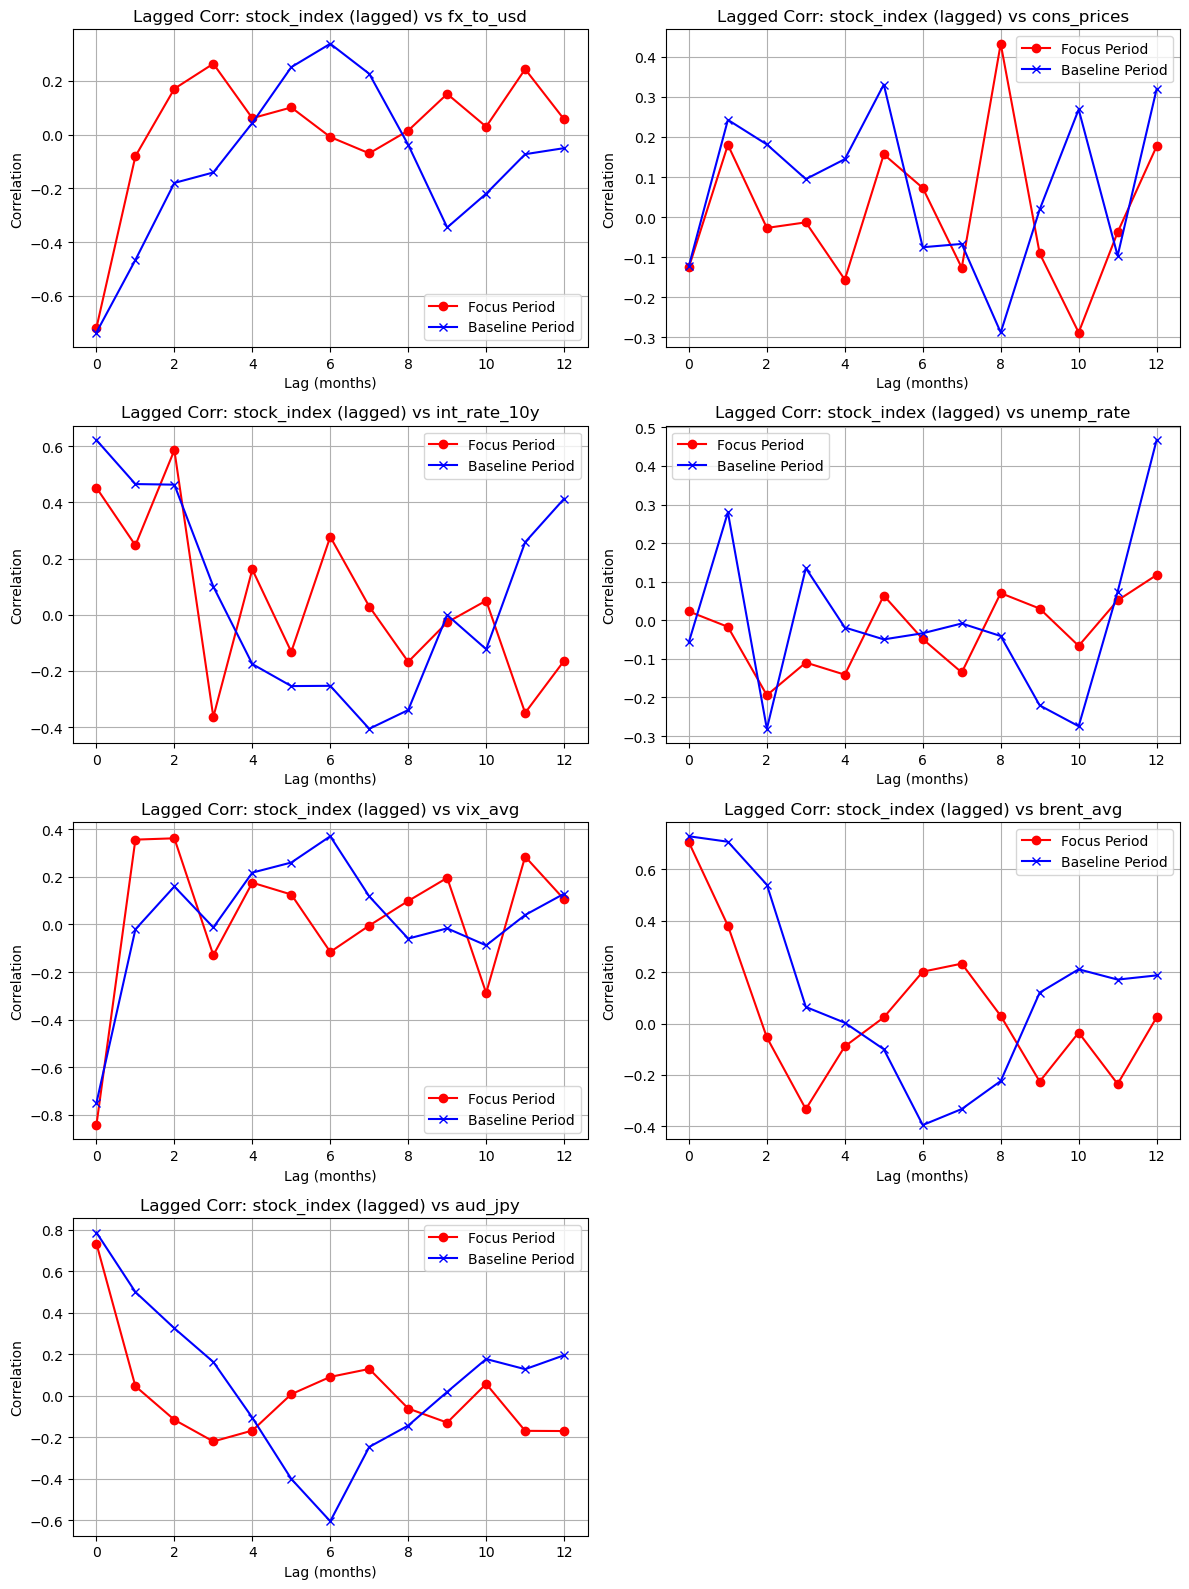

In [1421]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='stock_index',
    compare_cols=['fx_to_usd', 'cons_prices', 'int_rate_10y', 'unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=cov_19_mask_num_idx,
    baseline_mask=gfc_mask_num_idx,
    max_lag=12,
    figsize=(12, 16),
    rows=4
)

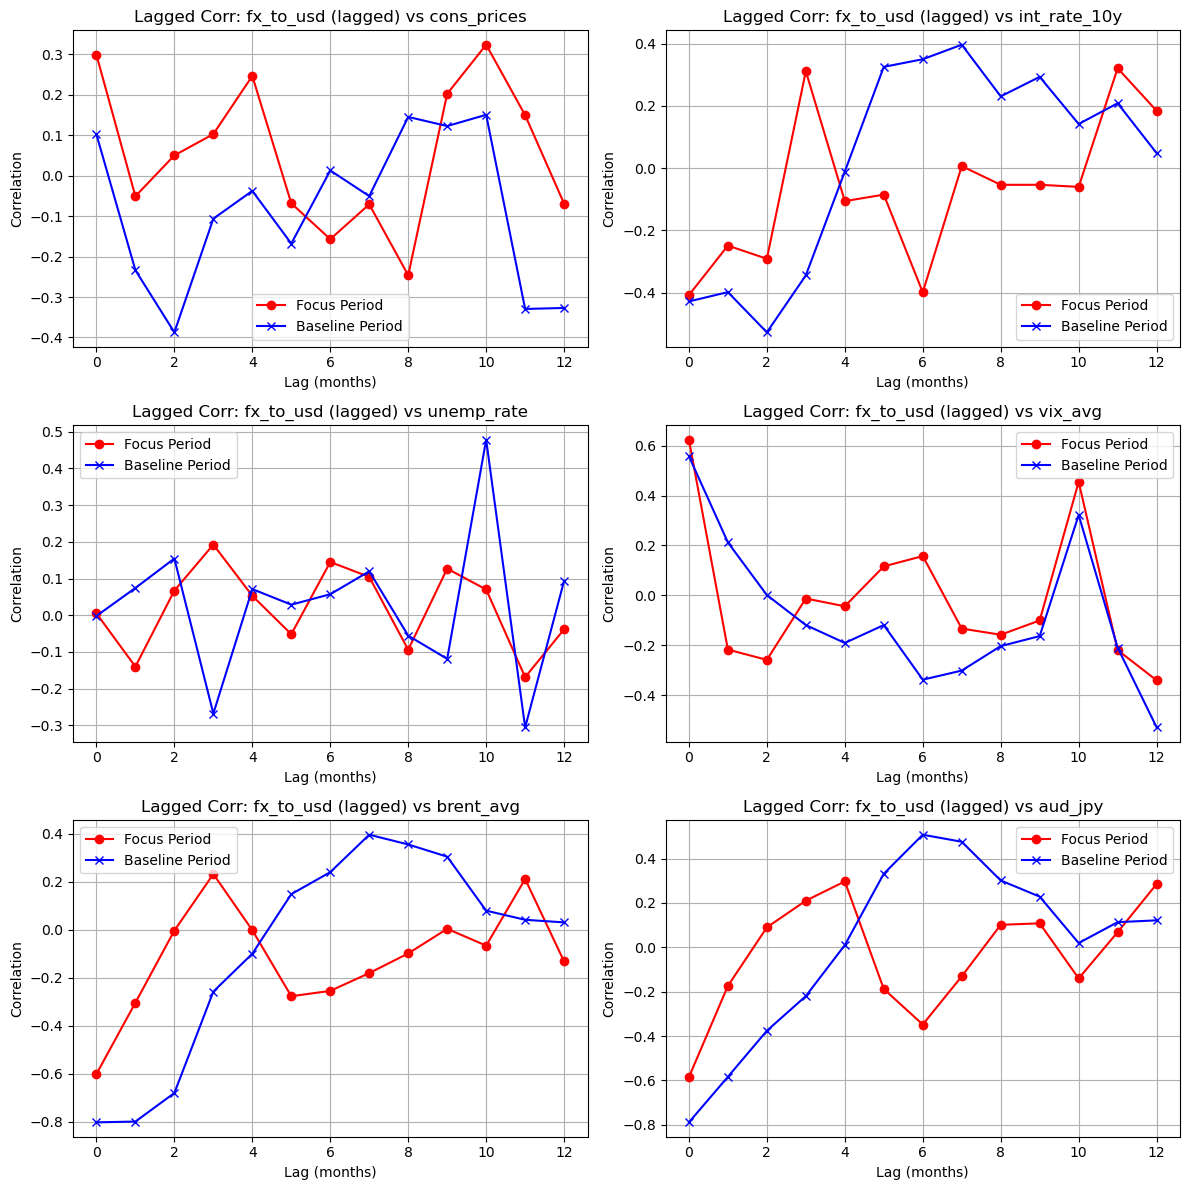

In [1423]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='fx_to_usd',
    compare_cols=['cons_prices', 'int_rate_10y', 'unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=cov_19_mask_num_idx,
    baseline_mask=gfc_mask_num_idx,
    max_lag=12,
    figsize=(12, 12),
    rows=3
)

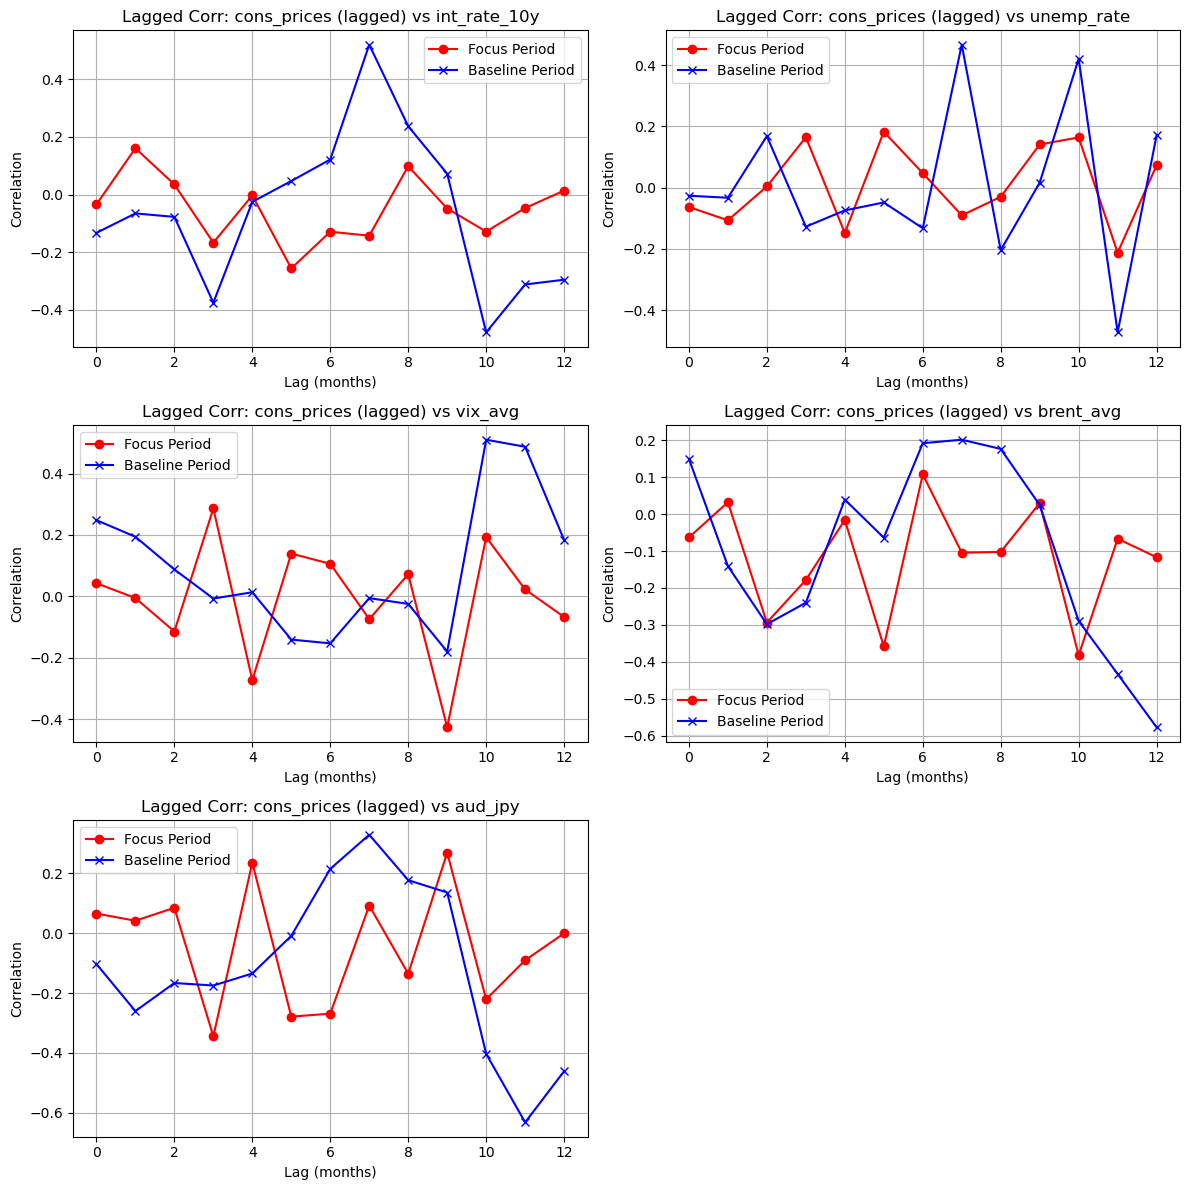

In [1425]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='cons_prices',
    compare_cols=['int_rate_10y', 'unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=cov_19_mask_num_idx,
    baseline_mask=gfc_mask_num_idx,
    max_lag=12,
    figsize=(12, 12),
    rows=3
)

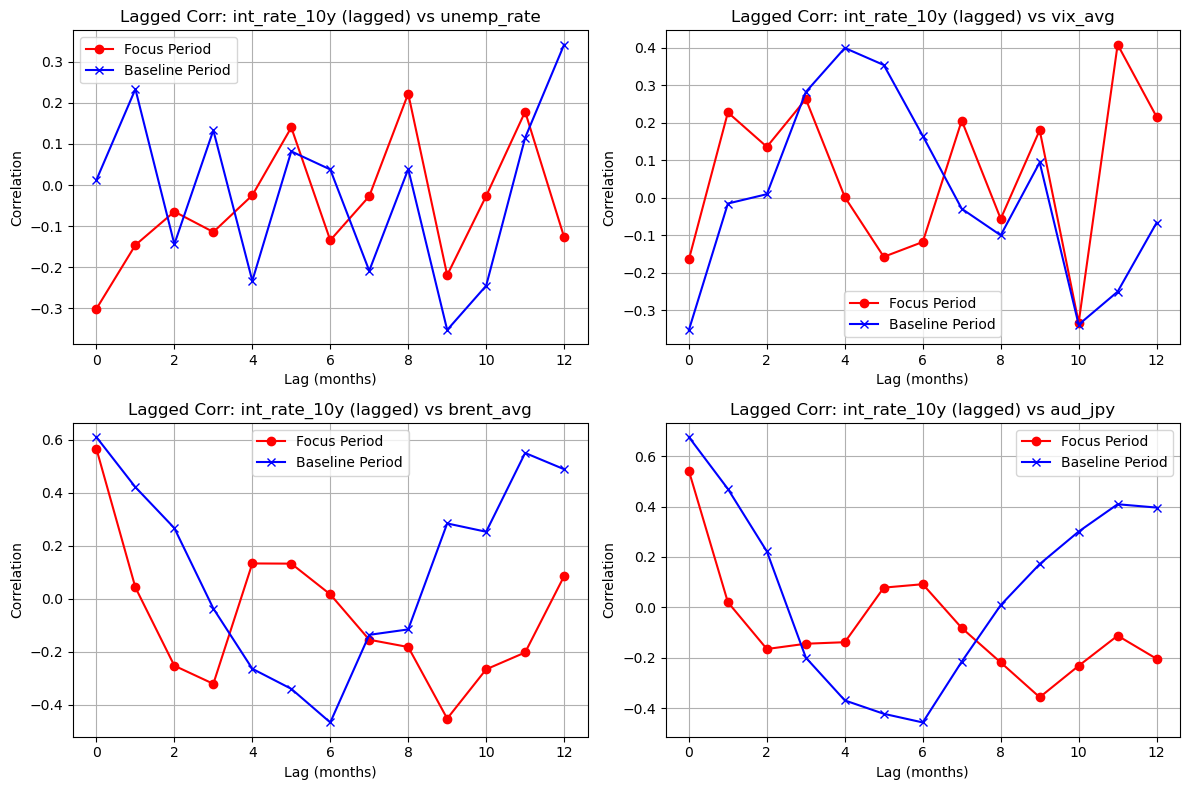

In [1427]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='int_rate_10y',
    compare_cols=['unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=cov_19_mask_num_idx,
    baseline_mask=gfc_mask_num_idx,
    max_lag=12,
    figsize=(12, 8),
    rows=2
)

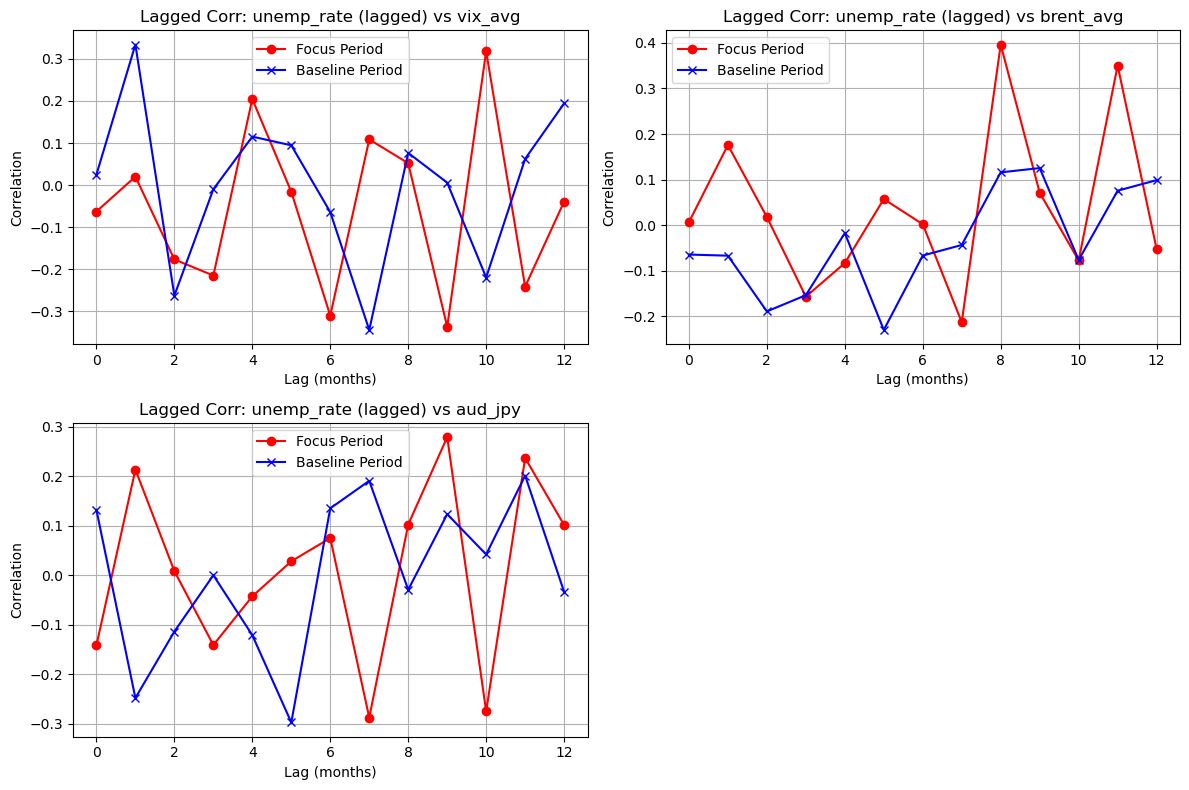

In [1429]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='unemp_rate',
    compare_cols=['vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=cov_19_mask_num_idx,
    baseline_mask=gfc_mask_num_idx,
    max_lag=12,
    figsize=(12, 8),
    rows=2
)

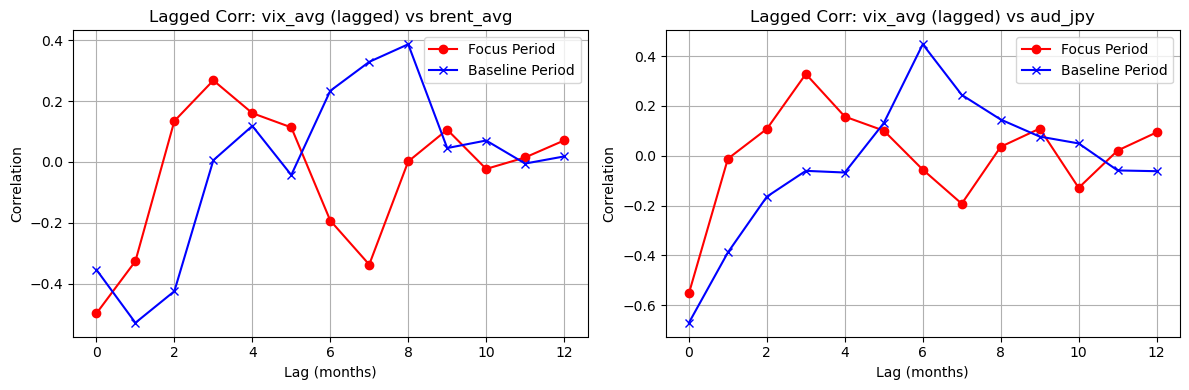

In [1431]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='vix_avg',
    compare_cols=['brent_avg', 'aud_jpy'],
    focus_mask=cov_19_mask_num_idx,
    baseline_mask=gfc_mask_num_idx,
    max_lag=12,
    figsize=(12, 4),
    rows=1
)

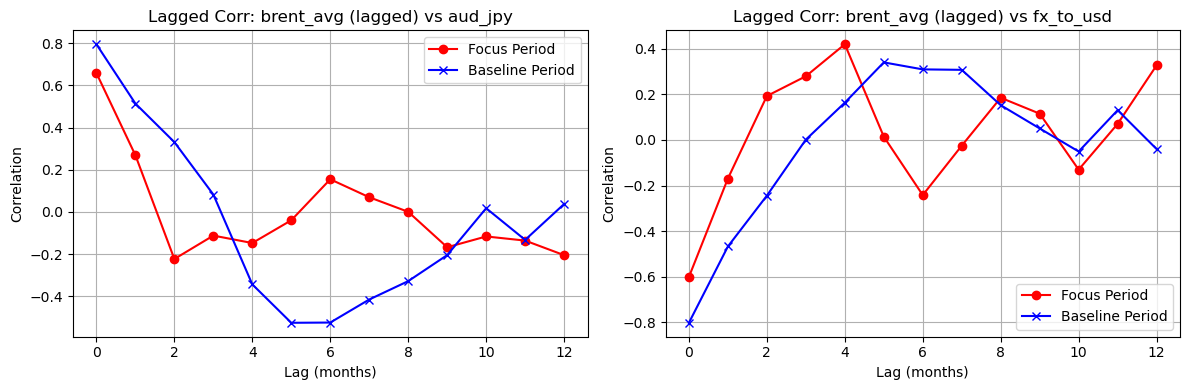

In [1433]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='brent_avg',
    compare_cols=['aud_jpy', 'fx_to_usd'],
    focus_mask=cov_19_mask_num_idx,
    baseline_mask=gfc_mask_num_idx,
    max_lag=12,
    figsize=(12, 4),
    rows=1
)

### Findings

#### (1) The Covid-19 era saw more muted amplitude of correlation strength gyrations over lagged ranges (out to 12 months) for the variable pairs than during the GFC.  This is unexpected insofar as the PCA + k-means clustering analysis in this project segment shows no cluster pivot ("regime" change) for Norway during the GFC. Rather, regime pivots occurred during the CPC (2014 Commodity Price Collapse) and Covid-19. Meanwhile, a different comparison (in the United States section below) will show that the GFC impacted Norway less than it did the US, which did experience a cluster pivot during that crisis.

#### (2) Strongest lag=0 variable pair correlations during the Covid-19 era were similar to those from the GFC era, but the magnitude was less in all cases except two: USDNOK ('fx_to_usd') vs VIX (vix_avg), and the Norwegian stock index ('stock_index') vs VIX.  Again, the GFC may have served as a dress rehearsal preparing Norway's institutions for Covid-19.

#### (3) Variable pair correlations that deviated sharply during Covid-19 vs the GFC, respectively: (i) Norwegian stock market lag=8 peak > +0.4 vs inflation rate ('cons_prices') -0.29 value, an opposite dynamic likely due to different prevailing conditions/environment (and government/central bank crisis response) -- moreover, Norway has low relative inflation, like Switzerland, avoiding the Pandora's Box other countries can face; (ii) stock market +0.6 peak correlation with the 10-year interest rate ('int_rate-10y') at lag=2 vs lag=0; (iii) stock market had no correlation with the unemployment rate ('unemp_rate') during Covid-19 vs a moderately-positive +0.48 at lag=12 during the GFC, likely just independent co-movement of those two variables; (iv) 10-year interest rate vs VIX peak +0.4 correlation at lag=11 vs lag=4 (central banks respond on different timescales major crisis to crisis); and (v) unemployment rate vs Brent crude oil (USD) ('brent_avg') found a +0.4 positive correlation peak at lag=8 during Covid-19 versus no correlation during the GFC; the positive correlation instance does not make intuitive sense and may be an artifact of co-movement.

### Finally: What were the variable pair correlations across the entire 19+ year period (inclusive of all shock and normal periods)?  Which variable relationships weathered both stormy and calm periods?

## Full Period (all shock and normal periods)

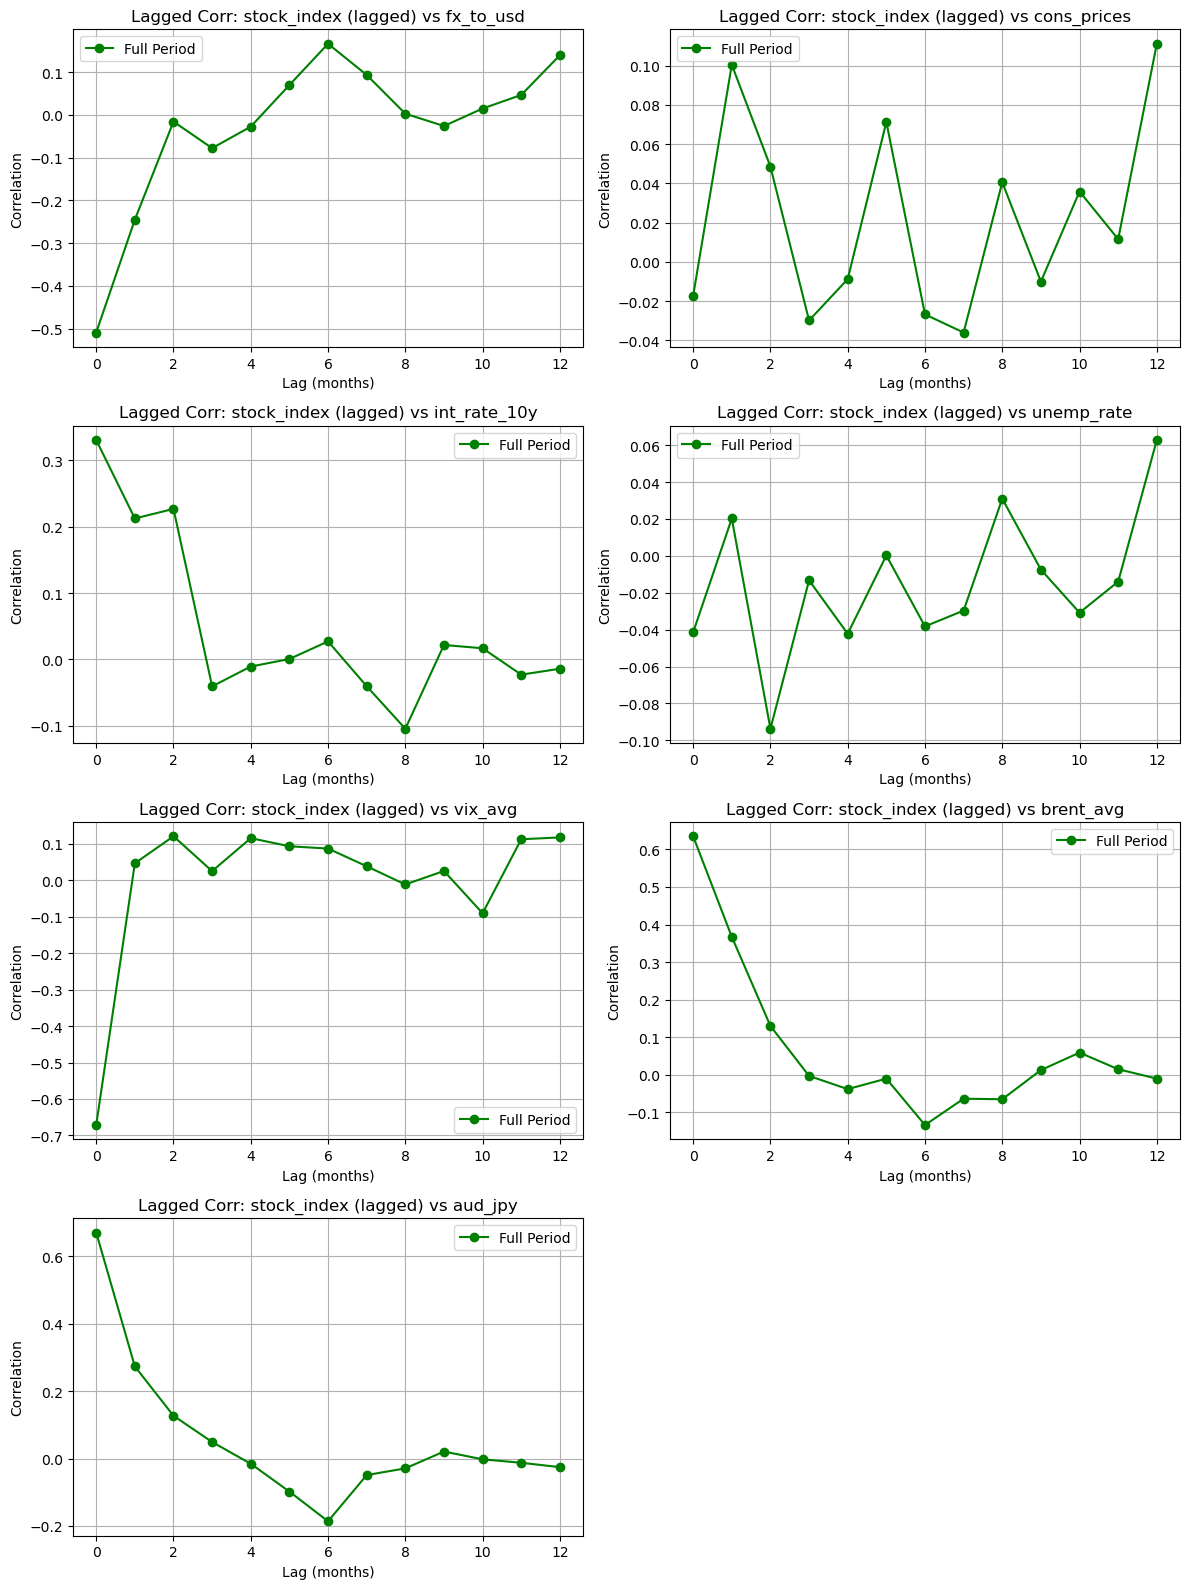

In [1462]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='stock_index',
    compare_cols=['fx_to_usd', 'cons_prices', 'int_rate_10y', 'unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=None,
    baseline_mask=None,
    max_lag=12,
    figsize=(12, 16),
    rows=4
)

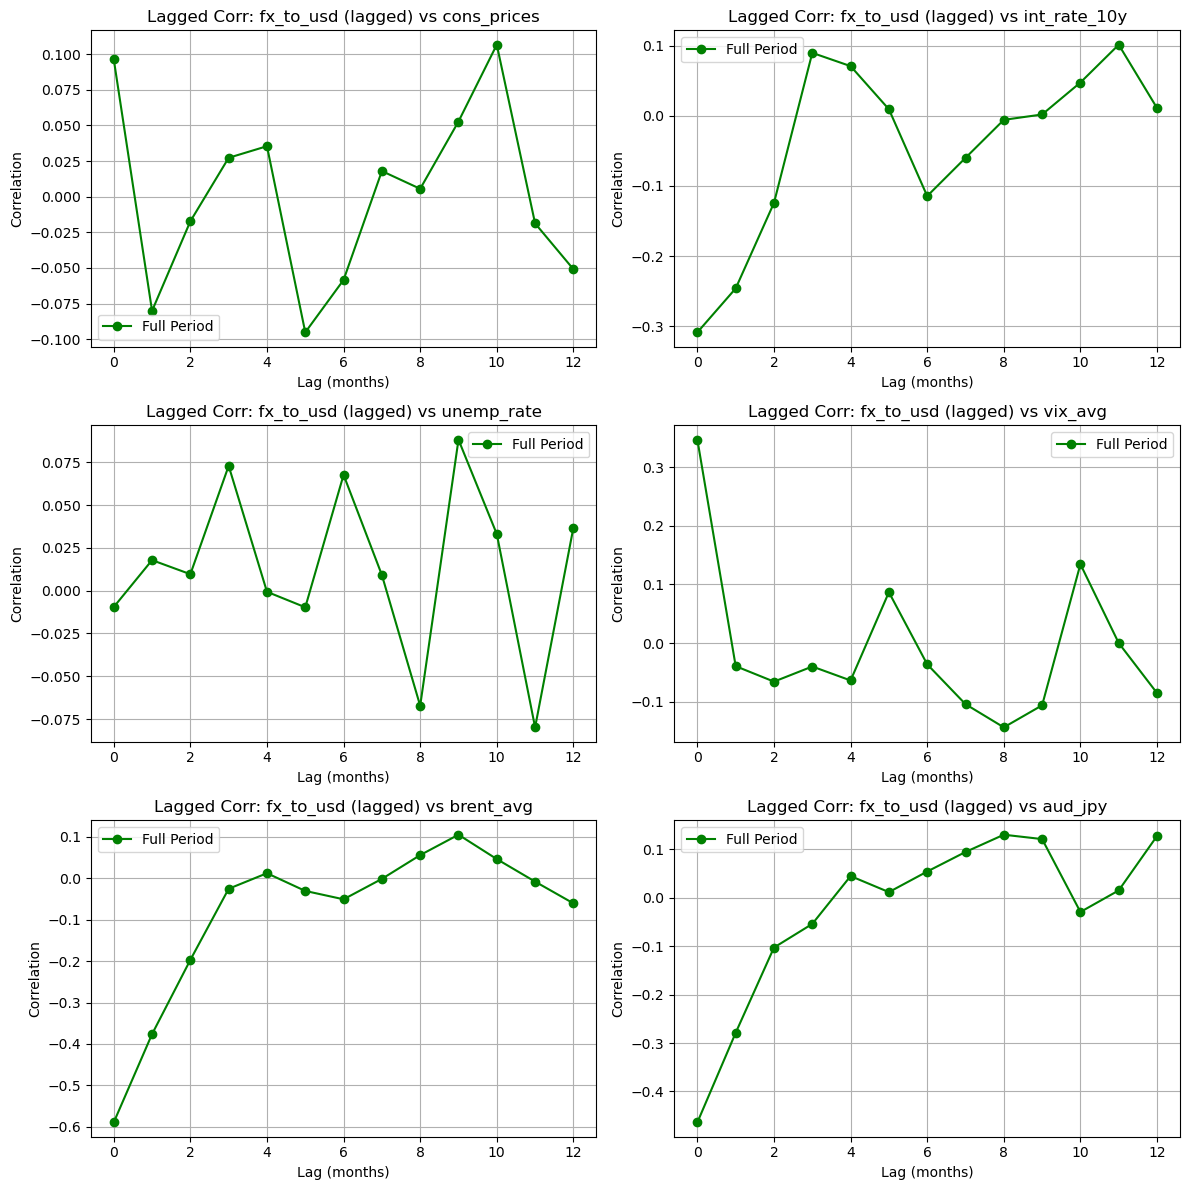

In [1464]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='fx_to_usd',
    compare_cols=['cons_prices', 'int_rate_10y', 'unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=None,
    baseline_mask=None,
    max_lag=12,
    figsize=(12, 12),
    rows=3
)

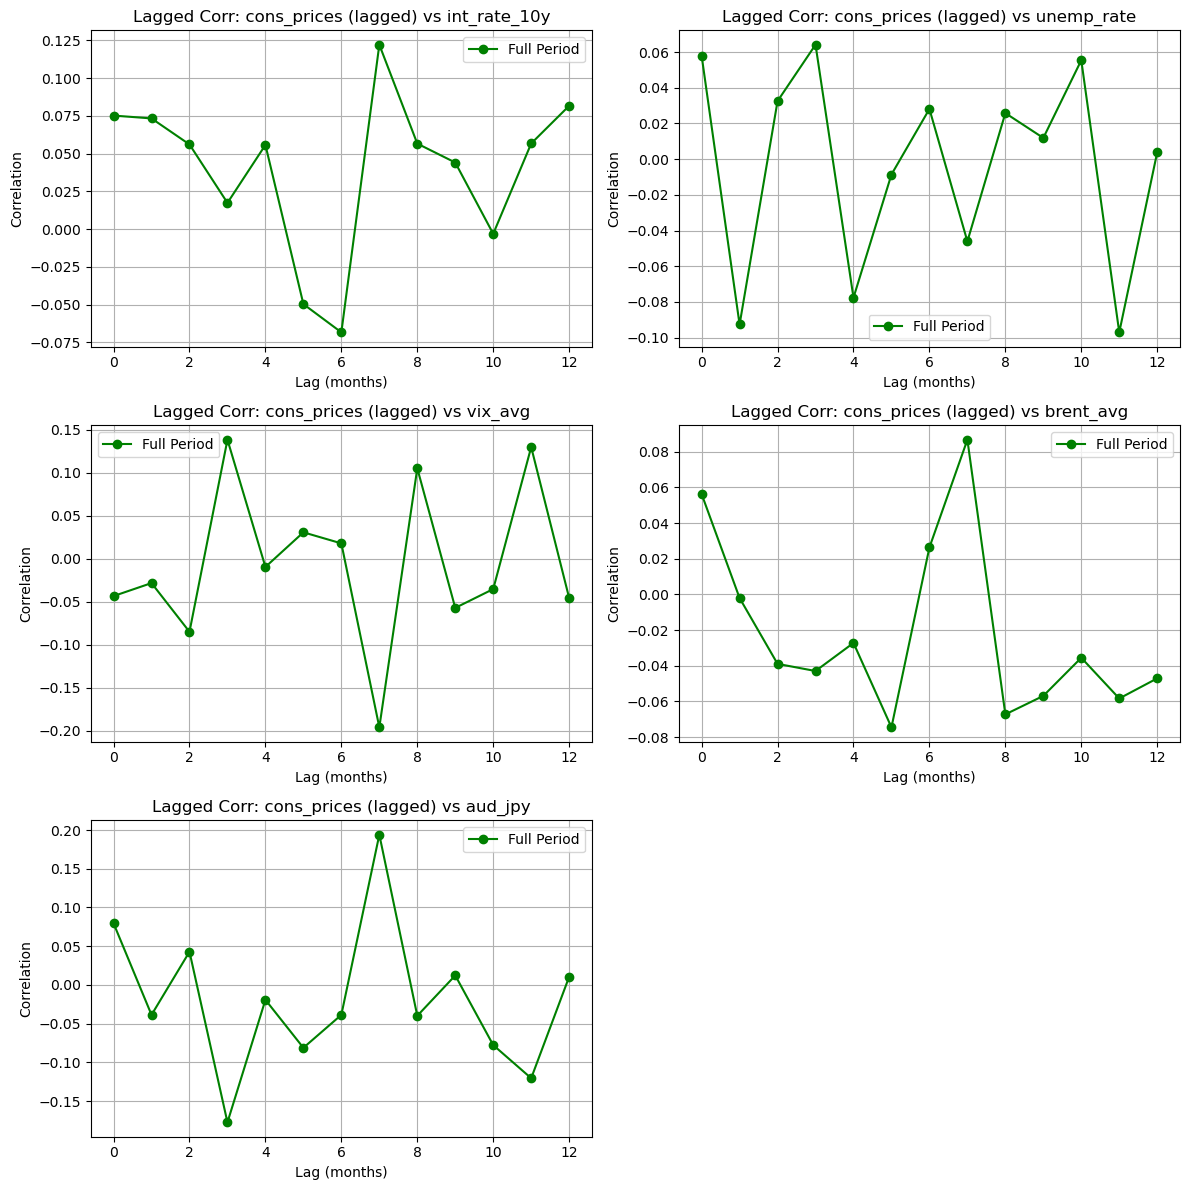

In [1466]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='cons_prices',
    compare_cols=['int_rate_10y', 'unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=None,
    baseline_mask=None,
    max_lag=12,
    figsize=(12, 12),
    rows=3
)

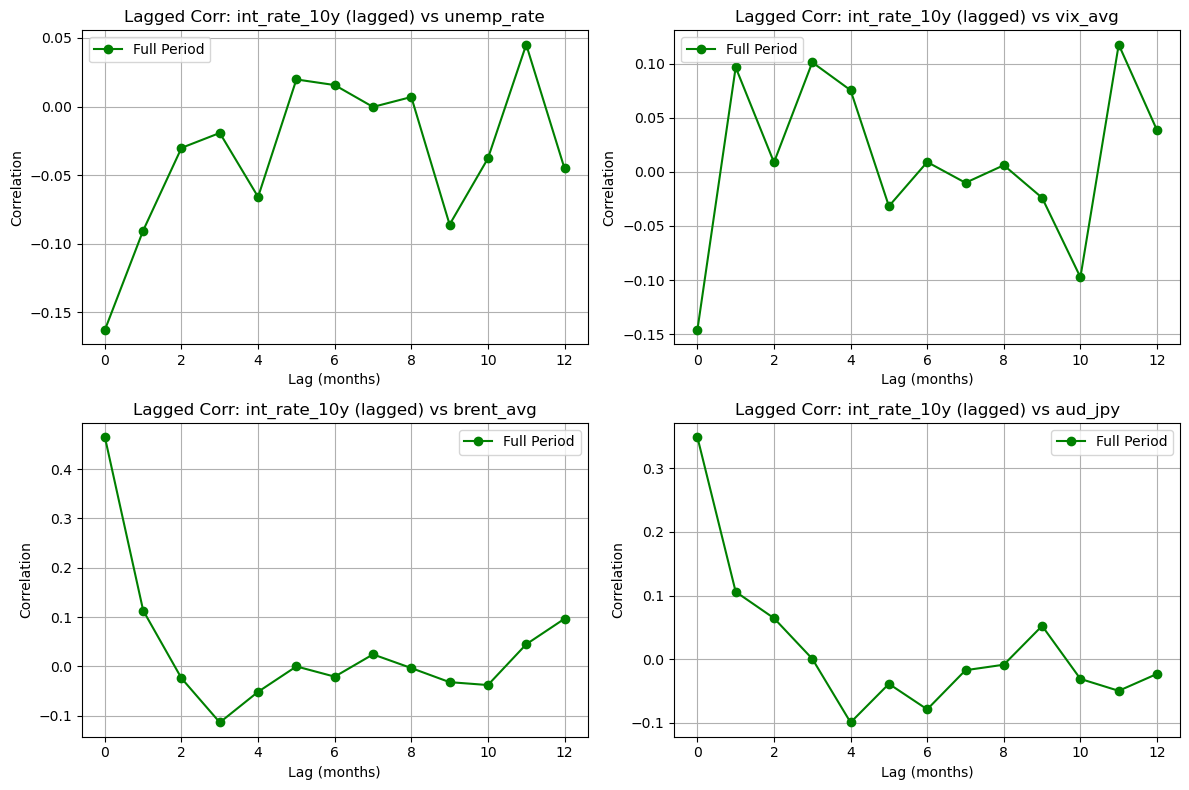

In [1468]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='int_rate_10y',
    compare_cols=['unemp_rate', 'vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=None,
    baseline_mask=None,
    max_lag=12,
    figsize=(12, 8),
    rows=2
)

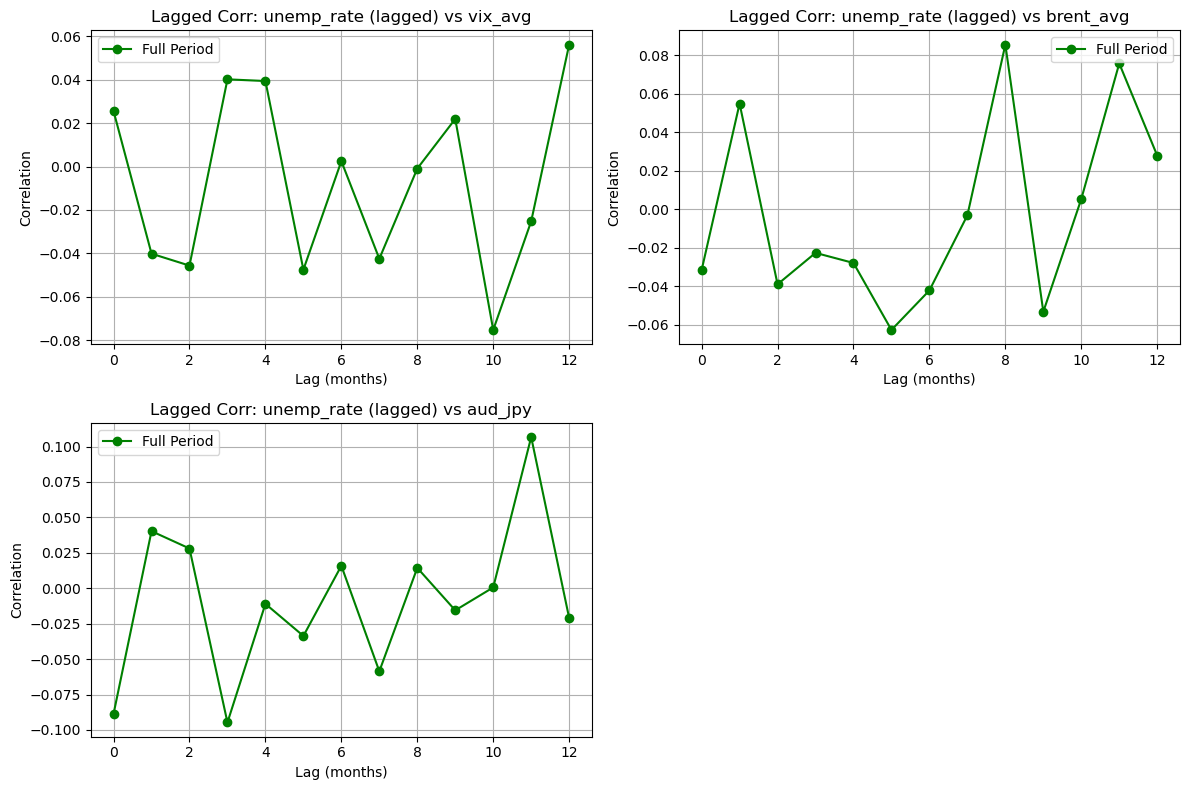

In [1470]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='unemp_rate',
    compare_cols=['vix_avg', 'brent_avg', 'aud_jpy'],
    focus_mask=None,
    baseline_mask=None,
    max_lag=12,
    figsize=(12, 8),
    rows=2
)

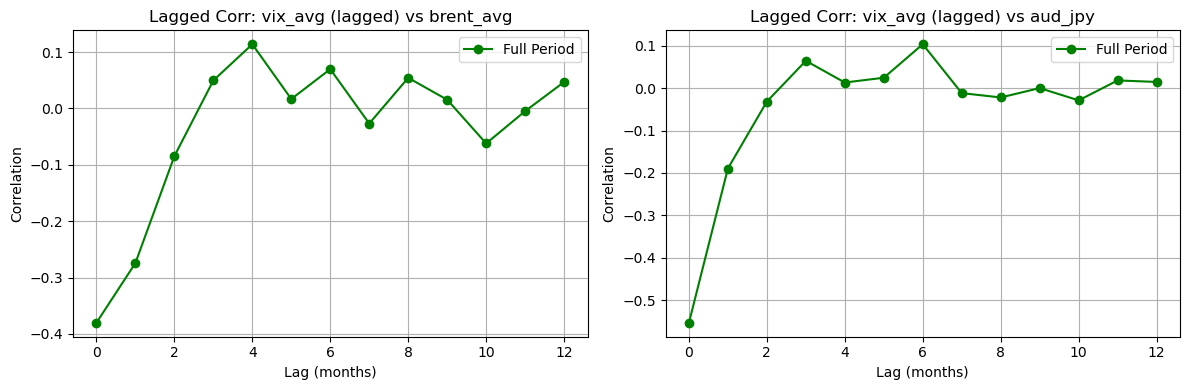

In [1472]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='vix_avg',
    compare_cols=['brent_avg', 'aud_jpy'],
    focus_mask=None,
    baseline_mask=None,
    max_lag=12,
    figsize=(12, 4),
    rows=1
)

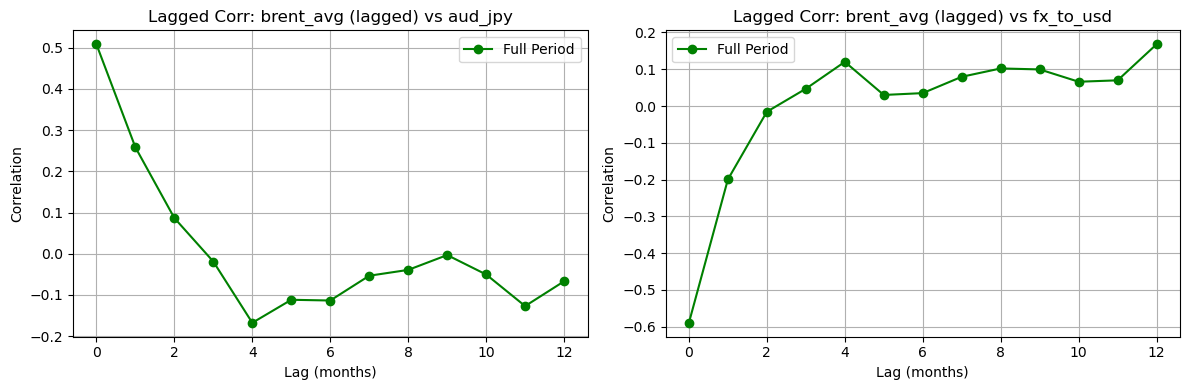

In [1474]:
batch_lagged_corr_dashboard(
    data=std_log_returns,
    target_col='brent_avg',
    compare_cols=['aud_jpy', 'fx_to_usd'],
    focus_mask=None,
    baseline_mask=None,
    max_lag=12,
    figsize=(12, 4),
    rows=1
)

### Findings

#### (1) 7 of 21 variable pair combinations found a 0.5 or higher absolute value of correlation (positive or negative), e.g. degree of relationship strength (but this measure is causality-agnostic) despite the wide range of economic and market conditions hitting Norway and the world over a secular period spanning the last 19+ years.  The numerical variables are all standardized, 1-month log returns (of original raw data monthly averages of daily values), therefore represent a defensible temporal (and hopefully, measurement cycle) compromise between using annual (sparse data, excess smoothing) or daily data (more data points but excess "noise" in the case of macroeconomic and financial time series data).

#### (2) The Norwegian stock market showed strong correlations with the VIX (-0.68), AUDJPY (+0.66), Brent crude oil USD price (+0.65), and moderately with USDNOK (-0.5).  Meanwhile, Brent crude oil USD price had a stronger correlation with USDNOK (-0.6) than with AUDJPY (+0.51), possibly because Norway is ensconced spatially in the middle of Brent crude extraction and production, while Australia is not. The Brent-USDNOK, commodity-FX cross-asset class strong relationship is also interesting to this analysis because the former is a key driver component of PC2 while the latter has a similar position in the PC1 loadings, from the earlier PCA results and findings. In the PC timeline line plots, PC1 and USDNOK show strong secular trending (upward) behavior, while PC2 and Brent crude oil (USD) price are poster children for mean-reversion (cyclical) behavior.  Finally, in the strong correlations camp, two external variables which act as risk sentiment barometers, VIX and AUDJPY, reveal a -0.56 correlation value.

#### (3) Over the full temporal period, without any analysis ringfencing to a major crisis, the 10-year interest rate had very little if any correlation with all other variables, except for a moderate positive correlation (+0.48) with Brent crude oil (USD) price. In other countries, one might expect to find a stronger correlation between interest rates and key variables, on a lagged basis typically.  Central banks are slow to respond, by design. However, in the crisis-ringfenced correlations examined here (further above), the 10-year interest rate did find relationships with AUDJPY and Brent crude oil (~ +0.60, lag=0, GFC and Covid-19), inflation rate (+0.47, lag=7, GFC only), VIX (+0.4, lags=4 or 11 depending on the crisis), USDNOK (-0.4 lag=0 and -0.46 lag=2, Covid-19 and GFC, respectively) and Norwegian stock market (+0.62 and +0.44, lag=0, GFC and Covid-19, respectively).